# Project 9.1 Using time series analysis for sales and demand forecasting



In this project, we will bridge the gap between theory and practical application by utilising time series analysis techniques to forecast sales and demand. Forecasting involves analysing historical sales data to accurately predict future sales trends and demand patterns.


Using time series analysis for sales and demand forecasting is crucial for data analysis in business because it can enhance decision-making by providing reliable sales and demand forecasts. This helps organisations reduce costs, maximise profits, and optimise resource allocation.


During this project, we will analyse the business scenario and explore the data set. We will then clean historical sales data, perform time series analysis using ARIMA, deep learning, or hybrid methods, and validate the models to ensure their accuracy in predicting future sales and demand patterns.


<br>

## **Business context**



The Nielsen BookScan service is the world’s largest continuous book sales tracking service in the world, operating in the UK, Ireland, Australia, New Zealand, India, South Africa, Italy, Spain, Mexico, Brazil, Poland, and Colombia. Nielsen BookScan collects transactional data at the point of sale, directly from tills and dispatch systems of all major book retailers. This ensures detailed and highly accurate sales information on which books are selling and at what price, giving clients the most up-to-date and relevant data. The Nielsen BookScan Total Consumer Market (TCM) data covers approximately 90% of all retail print book purchases in the UK. The remaining sites are specialised, such as gift shops, specialist booksellers, and tourist information centres.


Nielsen BookScan can be used to:
Monitor titles and authors against the competition and overall market.
Analyse pricing and discounting by format or category.
Gauge the success of marketing campaigns and promotions.
See which categories are growing and declining.
Learn what works in your market and how that might differ from other countries.

Nielsen BookScan sales data can be analysed by various criteria, including category, publisher, and format,
allowing users to see which genres are selling in which format. Users can track market trends to see which titles are driving the results, and patterns can easily be interpreted. In addition, the actual selling price is included. This inclusion makes it easier to identify trends for the level of discounting (e.g. by title, author, genre, format, region, and publisher) when analysing book sales.

**Project context**

Nielsen is seeking to invest in developing a new service aimed at small to medium-sized independent publishers. This service is aimed at supporting publishers in using historical sales data to make data-driven decisions about their future investment in new publications. Their publisher customers are interested in being able to make more accurate predictions of the overall sales profile post-publication for better stock control and initial investment, but they are also interested in understanding the useful economic life span that a title may have.

Nielsen is targeting small to medium-sized independent publishers as their research has shown that there is a strong demand for this insight, but businesses cannot invest in this infrastructure and would pay a premium to have access to quality-assured data and analysis in this area. Producing a new publication requires a significant upfront investment, and they would like to be able to more accurately identify books with strong long-term potential. More specifically, they are looking for titles with sales patterns that exhibit well-established seasonal patterns and positive trends that show potential great returns and to learn more about these types of publications. Nielsen will then apply this understanding to their commission and print volume strategy to be more successful in acquiring titles that have longevity. Additionally, this will enable them to deliver better returns by ensuring the correct stock levels in relation to demand and avoiding over- or understocking, which can be costly.

Some titles experience fluctuations in sales due to various factors, such as increased media attention or cultural relevance (e.g. the recent resurgence of interest in George Orwell’s 1984). However, certain books endure over time and are often studied in academic settings for their deeper significance.

For this project, Nielsen has provided two data sets. The objective is to identify sales patterns that demonstrate seasonal trends or any other traits, providing insights to inform reordering, restocking, and reprinting decisions for various books (by their International Standard Book Number, or ISBN).


<br>

## **Objective**

By the end of this project, we will have conducted a comprehensive analysis on select books from Nielsen's data, identifying key sales patterns that exhibit clear seasonal trends or other distinctive characteristics. These insights will serve as a data-driven foundation for optimising procurement, re-ordering, and stocking decisions, ensuring efficient inventory management.


In this Notebook, we will:
- Import both datasets, resample weekly sales data to ensure missing weeks are filled with zeros, and convert ISBNs to strings and dates to datetime objects.
- Filter out ISBNs with sales data beyond 2024-07-01, display these ISBNs, and plot their sales patterns for further analysis.
- Investigate the general sales patterns across different time periods (1-12 years vs. 12-24 years) and analyse possible reasons for any noticeable changes.
- Focus on two specific books, The Alchemist and The Very Hungry Caterpillar, for deeper analysis. Filter their data from 2012 onwards for further forecasting.
- Perform time series decomposition, ACF/PACF analysis, and stationarity checks for both books. Use Auto ARIMA to identify the best model and forecast the final 32 weeks of data.
- Prepare the data for machine learning models, create an XGBoost pipeline, tune parameters using grid search, and forecast the final 32 weeks for both books.
- Build and tune an LSTM model using KerasTuner, forecast the final 32 weeks of data, and evaluate the performance using MAE and MAPE.
- Apply both sequential and parallel hybrid models combining SARIMA and LSTM, tune the models, and evaluate their performance using various metrics.
- Aggregate weekly data to monthly data, train XGBoost and SARIMA models to forecast eight months, and compare results with weekly predictions.




We will also write a report summarising the results of our findings and recommendations.


<br></br>

## **Assessment criteria**
By completing this project, we will be able to provide evidence that we can:

- Pre-process a real industry data set to make it suitable for time series analysis.
- Apply various statistical tests to understand underlying characteristics of the data such as stationarity, seasonality and autocorrelation patterns.
- Perform time series decomposition to separate the data into trend, seasonal and residual components.
- Implement time series forecasting models.
- Fine-tune the model to improve model performance.




<br></br>

## **Project guidance**

**Import packages and data:**
1. Load the appropriate libraries and models.
2. Import the data set with the provided URL:
  - Data set's Drive link: https://drive.google.com/drive/folders/1o8fZaaECKUnLYJAK4pqR4e3WyOFYhc_o
  - Each file has four tabs, so ensure that you read the data from all four tabs.

**Conducting initial data investigation:**

1. Note that the data provided is weekly data. If no sales happened in a particular week, there will be no data representation for that week. This means that the data is not at fixed intervals.
As a result, resample the data and fill in missing values with 0, such that even weeks with 0 sales is represented.
2. Convert the ISBNs to a string value.
3. Convert date to datetime object. (Recall that setting the date as the index has several advantages for time series handling.)
4. Filter out the ISBNs (from all four tabs) wherein sales data exists beyond 2024-07-01. Show all the ISBNs that satisfy this criterion. Capture this in the report.
5. Plot the data of all the ISBNs from the previous step by placing them in a loop.
6. Investigate these plots to understand the general sales patterns, and comment on the general patterns visible in the data. Do the patterns drastically change for the period 1–12 years vs the period 12–24 years? Explain why or why not with possible reasons.
7. Select two books from the list (*The Alchemist* and *The Very Hungry Caterpillar*) for further analysis. Focus on the period >2012-01-01. Filter the sales data for both these books to retain the date range >2012-01-01, until the final datapoint.

**Classical techniques:**
1. Perform decomposition on the data for both books. Determine what type of decomposition is suitable for each book, and comment on the components' characteristics.
2. Perform ACF and PACF on both books. Comment on the results and what they indicate.
3. Check for stationarity of the data for both books. Comment on the results and what they indicate.
4. Perform Auto ARIMA on both books. **The forecast horizon is the final 32 weeks of data.** All prior data (from 2012-01-01 onwards) can be used as the training data. Set reasonable bounds for Auto ARIMA's various parameters so that Auto ARIMA can identify the most suitable model.
5. Comment on the best model provided by Auto ARIMA for both books.
6. Find the residuals of the 'best' model for both books. Comment on the residuals.
7. Use the best model to predict the final 32 weeks of data. Plot the prediction along with the confidence intervals for both books.
8. Comment on how the prediction compares with the actual values.

**Machine learning and deep learning techniques**
1. Prepare the data to feed into the machine learning models. The forecast horizon is **32 weeks**. The training data consists of all prior data, up to 2012-01-01.
2. Create the required pipeline for the XGBoost model.
3. Perform cross-validation.
4. Perform parameter tuning (including window_length) using grid search.
5. Identify the best models.
6. Use the best models to forecast the **final 32 weeks** of sales data for both books.
7. Plot the original data along with the predictions.
8. Display the MAE and MAPE.
9. Create an LSTM model for both books.
10. Apply KerasTuner, and perform hyperparameter tuning using the training data, for both books.
11. Use the best model to predict the **final 32 weeks** of data for both books.
12. Plot the original data along with the predictions.
13. Display the MAE and MAPE.

**Hybrid model**
1. Apply a hybrid model of SARIMA and LSTM in sequential combination wherein the residuals from SARIMA will be forecasted using LSTM. The final prediction will be the sum of the predictions from SARIMA and LSTM. The LSTM will be trained on the residuals obtained during the training of the SARIMA model. **The forecast horizon will be the final 32 weeks**. Use KerasTuner to get the best model. Plot the results. Display the MAE and MAPE, and comment on the results.
2. Apply a hybrid model of SARIMA and LSTM in parallel combination wherein the predictions from SARIMA and the predictions from LSTM will be combined in the form of a weighted average. The final prediction will be the weighted sum of the predictions from SARIMA and LSTM. Both the SARIMA and the LSTM will be trained separately on the complete training set. **The forecast horizon will be the final 32 weeks**. Use KerasTuner to get the best model. Plot the results. Display the MAE and MAPE, and comment on the results.
3. Modify the weightage in the parallel combination model to get different results. Find the weightage giving the best results, and comment on those results.

**Monthly prediction**
1. Instead of a weekly prediction, perform a monthly prediction. Aggregate the weekly sales data to monthly sales data for both books.
2. Train the XGBoost model on this data. Forecast using the trained model. The forecast horizon is 8 months. Plot the results, and calculate the MAE and MAPE.
3. Train the SARIMA model (using Auto ARIMA) on this data. Forecast using the trained model. The forecast horizon is 8 months. Plot the results, and calculate the MAE and MAPE.
4. Compare and contrast the monthly predictions of both books against the weekly predictions. Comment on which one is more accurate or if they are the same.




<br></br>
> **Declaration**
>
> By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the Cambridge plagiarism regulations.

# Conducting initial data investigation:

In [ ]:
!pip install tensorflow==2.15.1
#Downgrading numpy
!pip install numpy==1.24.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer # Or just: import xgboost as xgb and then use xgb.XGBRegressor()
import numpy as np
# Load the relevant helper functions from sktime.
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

# File paths
timeline_file = "/content/drive/MyDrive/topic/timeline.xlsx"
isbn_file = "/content/drive/MyDrive/topic/ISBN.xlsx"

# Read all sheets from timeline.xlsx
timeline_sheets = pd.read_excel(timeline_file, sheet_name=None)  # Returns a dict of DataFrames
df_timeline = pd.concat(timeline_sheets.values(), ignore_index=True)

# Read all sheets from ISBN.xlsx
isbn_sheets = pd.read_excel(isbn_file, sheet_name=None)
df_isbn = pd.concat(isbn_sheets.values(), ignore_index=True)

# Display the first few rows of both DataFrames
print("Timeline DataFrame:")
print(df_timeline.head())

print("\nISBN DataFrame:")
print(df_isbn.head())



Timeline DataFrame:
            ISBN            Title         Author  Interval   End Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

      

In [ ]:
df_isbn.shape

(500, 10)

In [ ]:
df_timeline.shape

(227224, 13)

Note that the data provided is weekly data. If no sales happened in a particular week, there will be no data representation for that week. This means that the data is not at fixed intervals. As a result, resample the data and fill in missing values with 0, such that even weeks with 0 sales is represented.

In [ ]:
#### convert end date to date time

#  Make sure 'End Date' is datetime
df_timeline['End Date'] = pd.to_datetime(df_timeline['End Date'])

df_timeline = df_timeline.set_index('End Date')



In [ ]:
#### replace missing weeks with 0

# Count the number of missing values in each column
missing_count_timeline = df_timeline.isnull().sum()
print(missing_count_timeline)

ISBN                   0
Title                  0
Author             14879
Interval               0
Volume                 0
Value                  0
ASP                  343
RRP                 5962
Binding                0
Imprint                0
Publisher Group        0
Product Class          0
dtype: int64


In [ ]:
# Count the number of missing values in each column
missing_count_isbn = df_isbn.isnull().sum()
print(missing_count_isbn)

ISBN                       0
Title                      0
Author                    74
Imprint                    0
Publisher Group            0
RRP                       27
Binding                    0
Publication Date           0
Product Class              0
Country of Publication     0
dtype: int64


Missing values were found in columns such as author, RRP, and ASP. Nevertheless, these columns do not affect our investigation or forecasting, so they were neither erased nor imputed.

In [ ]:

# Resample the df_timeline to a weekly frequency, ending on Saturday, grouping by ISBN and title, and aggregating the volume values for each week.

dftl_all_weeks = (df_timeline.groupby(['ISBN', 'Title']).resample('W-SAT').agg({'Volume': 'sum'}).fillna(0).reset_index())

# Display the final DataFrame
dftl_all_weeks

ISBN                        Title   End Date  Volume
0       9780001713031          Cat in the Hat, The 2001-01-06     522
1       9780001713031          Cat in the Hat, The 2001-01-13     379
2       9780001713031          Cat in the Hat, The 2001-01-20     393
3       9780001713031          Cat in the Hat, The 2001-01-27     369
4       9780001713031          Cat in the Hat, The 2001-02-03     423
...               ...                          ...        ...     ...
382866  9781903840122  Wicked Book of Txt Tlk, The 2008-11-22       0
382867  9781903840122  Wicked Book of Txt Tlk, The 2008-11-29       0
382868  9781903840122  Wicked Book of Txt Tlk, The 2008-12-06       1
382869  9781903840122  Wicked Book of Txt Tlk, The 2008-12-13       4
382870  9781903840122  Wicked Book of Txt Tlk, The 2008-12-20       2

[382871 rows x 4 columns]

It looks like the dataframe contains all weeks for all the books and their respective volumes sold

Convert the ISBNs to a string value.

Convert date to datetime object. (Recall that setting the date as the index has several advantages for time series handling.)

In [ ]:
dftl_all_weeks ["ISBN"] = dftl_all_weeks['ISBN'].astype(str)
print(dftl_all_weeks.dtypes) #### object in pandas is string

ISBN                object
Title               object
End Date    datetime64[ns]
Volume               int64
dtype: object


ISBN is now converted to a string , End date was already converted to a datetime obeject.

"Filter out the ISBNs (from all four tabs) wherein sales data exists beyond 2024-07-01.

Show all the ISBNs that satisfy this criterion. Capture this in your report. "

In [ ]:
# Define the start date for filtering
start_date = '2024-07-01'
start_date = pd.to_datetime(start_date)

# Filter the DataFrame
df_filtered = dftl_all_weeks[dftl_all_weeks['End Date'] >= start_date]

# Display the filtered DataFrame
print(df_filtered)

                 ISBN                                              Title  \
7977    9780006512134                                        Man and Boy   
7978    9780006512134                                        Man and Boy   
11006   9780006514091                                  Glass Palace, The   
11007   9780006514091                                  Glass Palace, The   
11008   9780006514091                                  Glass Palace, The   
...               ...                                                ...   
366026  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
366027  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
367254  9781841462509                             KS2 Science Study Book   
367255  9781841462509                             KS2 Science Study Book   
367256  9781841462509                             KS2 Science Study Book   

         End Date  Volume  
7977   2024-07-06       1  
7978   2024-07-13       6  
110

In [ ]:
print(df_filtered['ISBN'].unique())
print(df_filtered['ISBN'].nunique())


['9780006512134' '9780006514091' '9780006514213' '9780006531203'
 '9780006550433' '9780006647553' '9780007101887' '9780091816971'
 '9780091867775' '9780099244721' '9780099285823' '9780099286387'
 '9780099286578' '9780099422587' '9780099428558' '9780099771517'
 '9780140259506' '9780140275421' '9780140276336' '9780140276619'
 '9780140281293' '9780140285215' '9780140294231' '9780140295962'
 '9780224060875' '9780241003008' '9780261103252' '9780330355667'
 '9780340696767' '9780340766057' '9780340786055' '9780349112763'
 '9780349113609' '9780349114033' '9780440864141' '9780440864554'
 '9780552145053' '9780552145060' '9780552145954' '9780552997034'
 '9780552997348' '9780552998000' '9780552998444' '9780552998482'
 '9780552998727' '9780593048153' '9780719559792' '9780722532935'
 '9780744523232' '9780747268161' '9780749395698' '9780749397548'
 '9780752844299' '9780752846576' '9781841150437' '9781841460307'
 '9781841460406' '9781841461502' '9781841462301' '9781841462400'
 '9781841462509']
61


There are61 books sold after '2024-07-01'

Plot the data of all the ISBNs from the previous step by placing them in a loop.

In [ ]:

# Set 'End Date' as index
df_filtered.set_index('End Date', inplace=True)

<ipython-input-11-06d5a93f0d4b>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


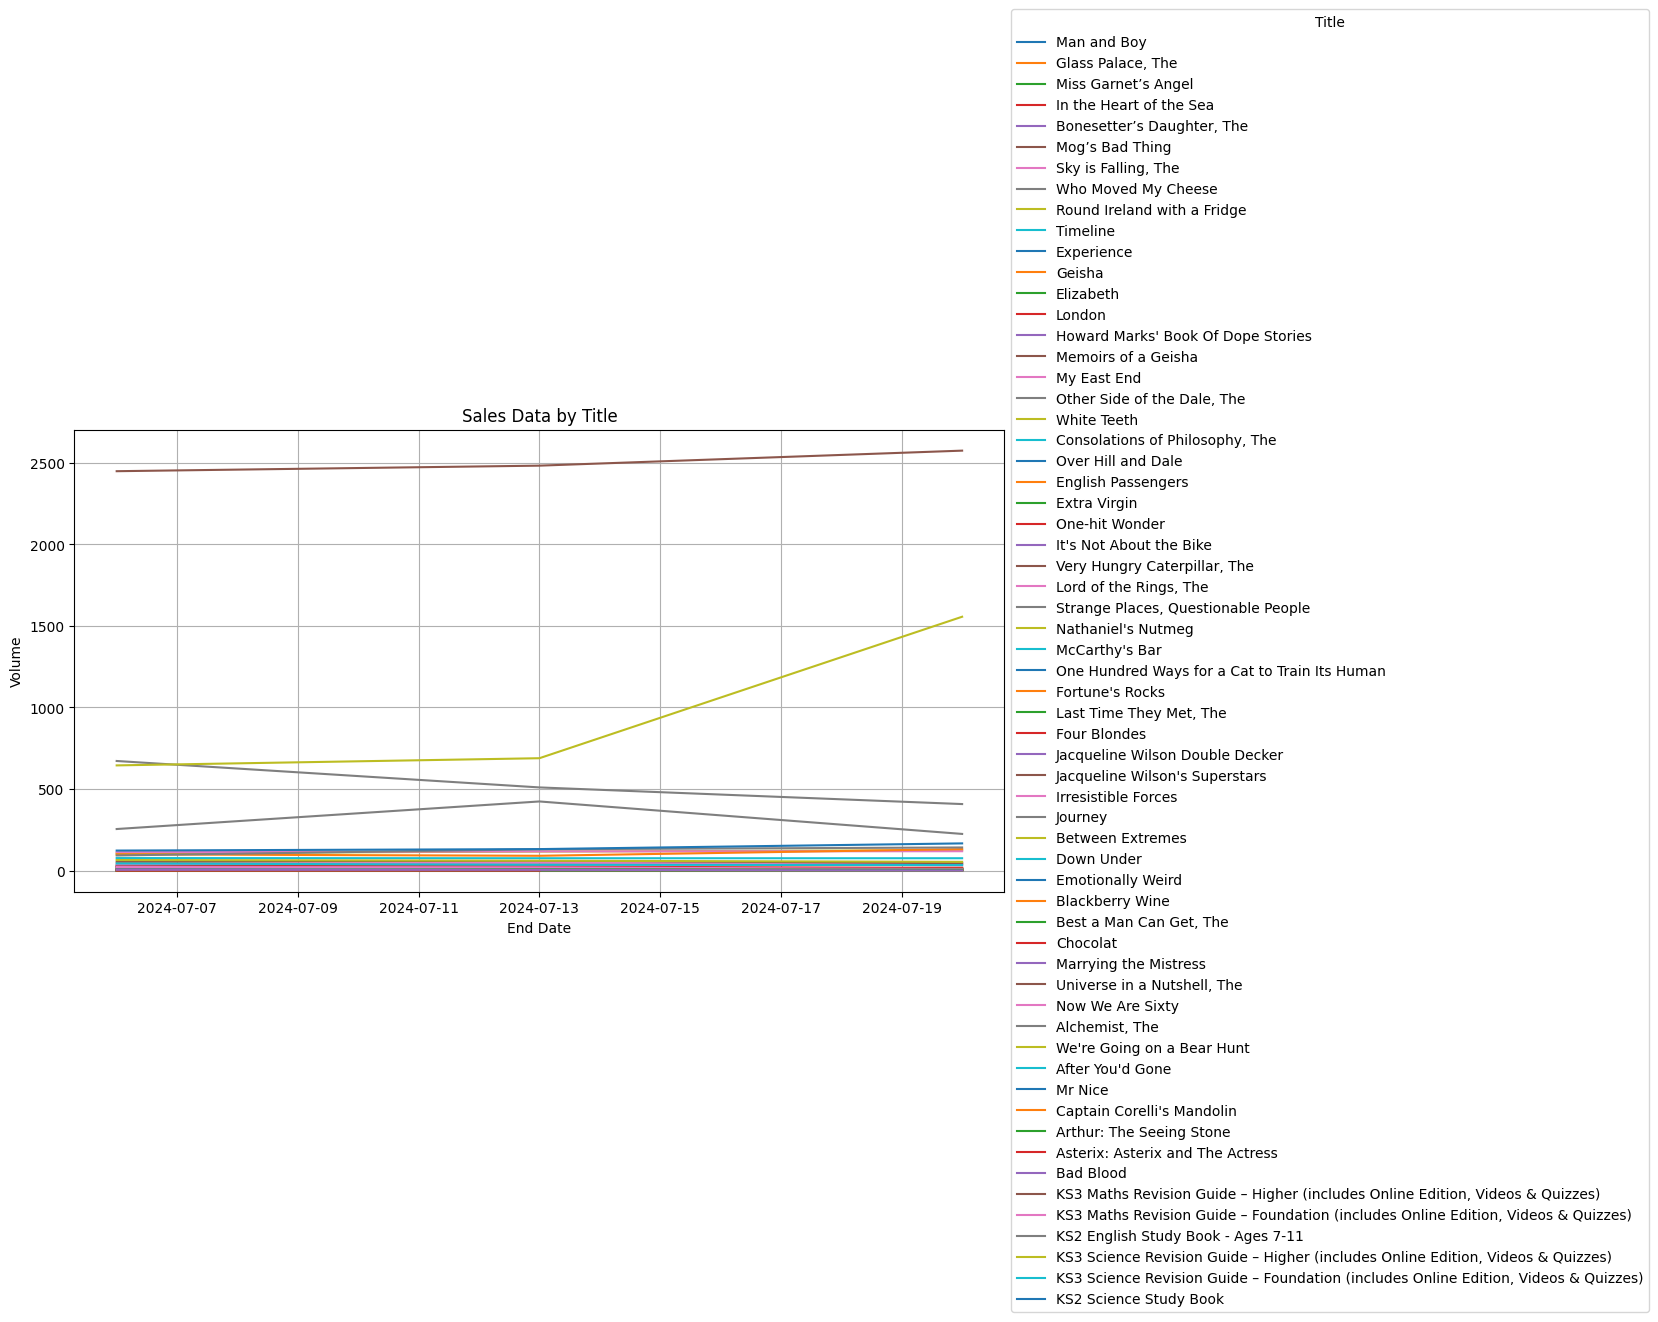

In [ ]:
import matplotlib.pyplot as plt


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each unique ISBN and plot using the Title for the legend
for isbn in df_filtered['ISBN'].unique():
    df_isbn = df_filtered[df_filtered['ISBN'] == isbn]
    title = df_isbn['Title'].iloc[0]  # Get the title of the book
    ax.plot(df_isbn.index, df_isbn['Volume'], label=title)

# Set labels and title
ax.set_title("Sales Data by Title")
ax.set_xlabel('End Date')
ax.set_ylabel('Volume')
ax.grid(True)

# Place legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()





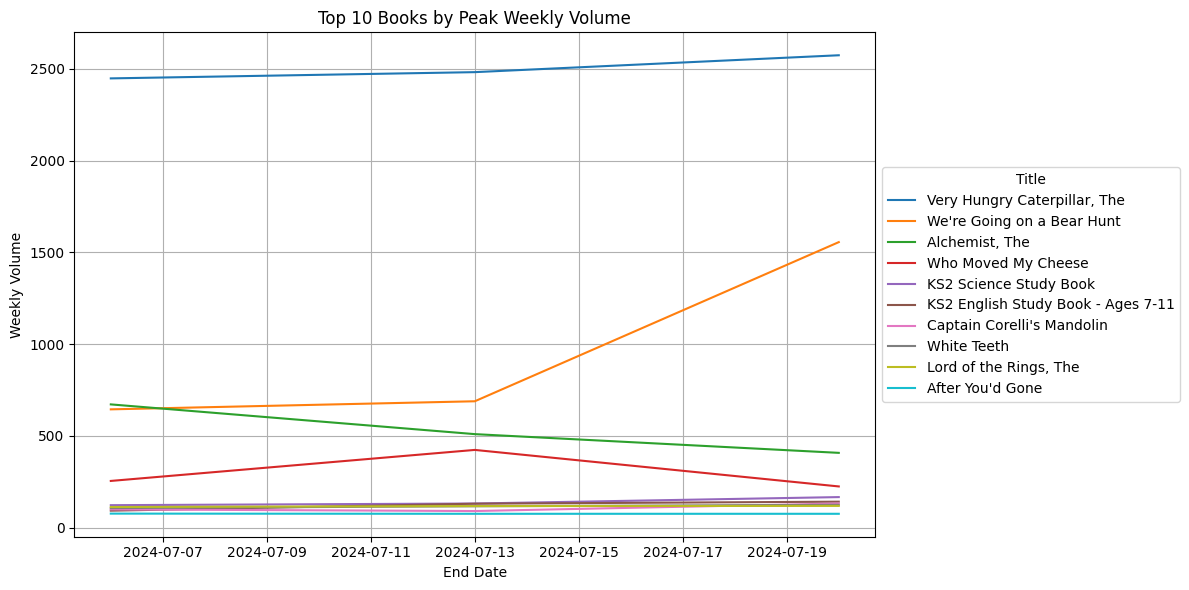

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Find the max weekly volume per ISBN
top_isbns = df_filtered.groupby('ISBN')['Volume'].max().sort_values(ascending=False).head(10).index

# Step 2: Plot only those top ISBNs
fig, ax = plt.subplots(figsize=(12, 6))

for isbn in top_isbns:
    df_isbn = df_filtered[df_filtered['ISBN'] == isbn]
    title = df_isbn['Title'].iloc[0]
    ax.plot(df_isbn.index, df_isbn['Volume'], label=title)

# Step 3: Customize the plot
ax.set_title("Top 10 Books by Peak Weekly Volume")
ax.set_xlabel('End Date')
ax.set_ylabel('Weekly Volume')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')
plt.tight_layout()
plt.show()


"Investigate these plots to understand the general sales patterns, and comment on the general patterns visible in the data.

Do the patterns drastically change for the period 1–12 years vs the period 12–24 years? Explain why or why not with possible reasons."

In [ ]:
print("Min End Date:", dftl_all_weeks['End Date'].min())
print("Max End Date:", dftl_all_weeks['End Date'].max())


Min End Date: 2001-01-06 00:00:00
Max End Date: 2024-07-20 00:00:00


In [ ]:
df_before_2012= dftl_all_weeks[dftl_all_weeks['End Date'] <="2012-01-01"]
df_after_2012= dftl_all_weeks[dftl_all_weeks['End Date'] >="2012-01-01"]

<ipython-input-15-c116ba01dad0>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


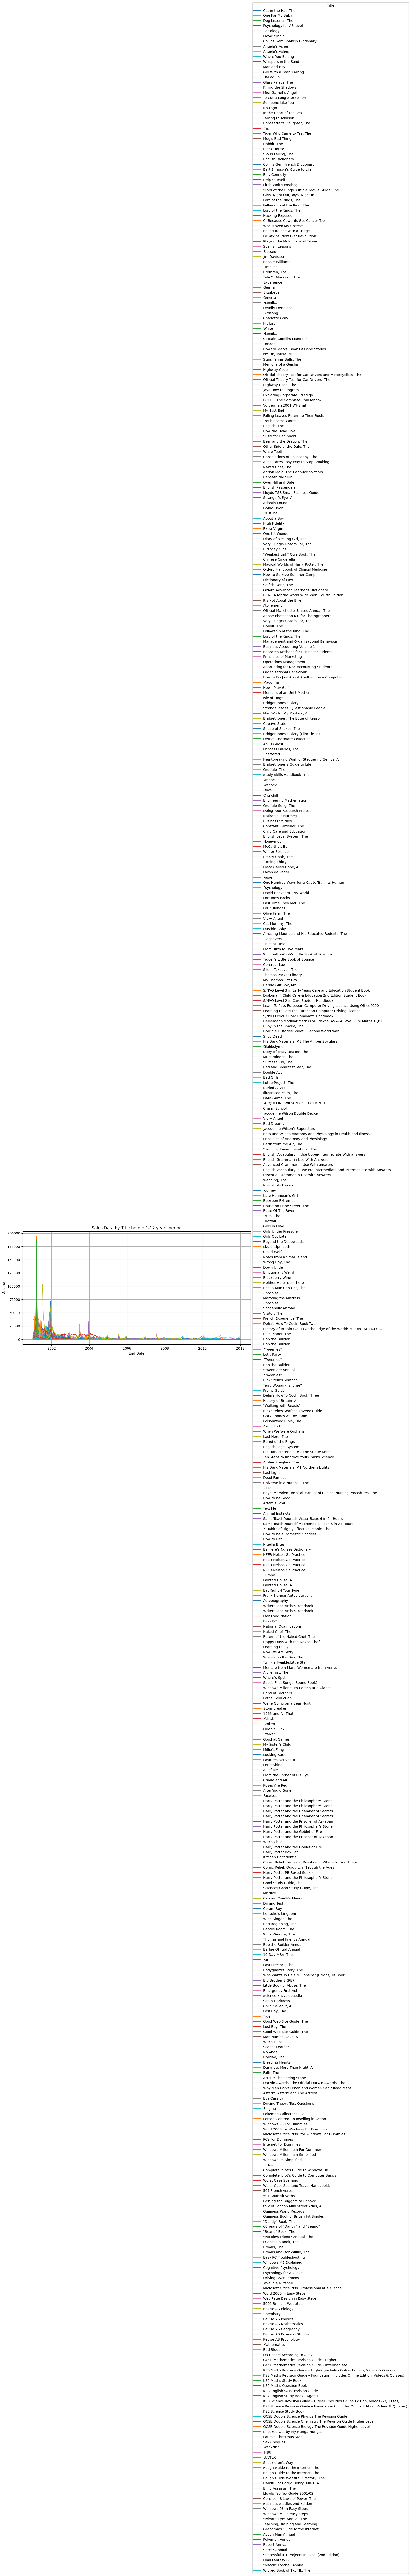

In [ ]:
# Set 'End Date' as index
df_before_2012.set_index('End Date', inplace=True)
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each unique ISBN and plot using the Title for the legend
for isbn in df_before_2012['ISBN'].unique():
    df_isbn_before = df_before_2012[df_before_2012['ISBN'] == isbn]
    title = df_isbn_before['Title'].iloc[0]  # Get the title of the book
    ax.plot(df_isbn_before.index, df_isbn_before['Volume'], label=title)

# Set labels and title
ax.set_title("Sales Data by Title before 1-12 years period")
ax.set_xlabel('End Date')
ax.set_ylabel('Volume')
ax.grid(True)

# Place legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()


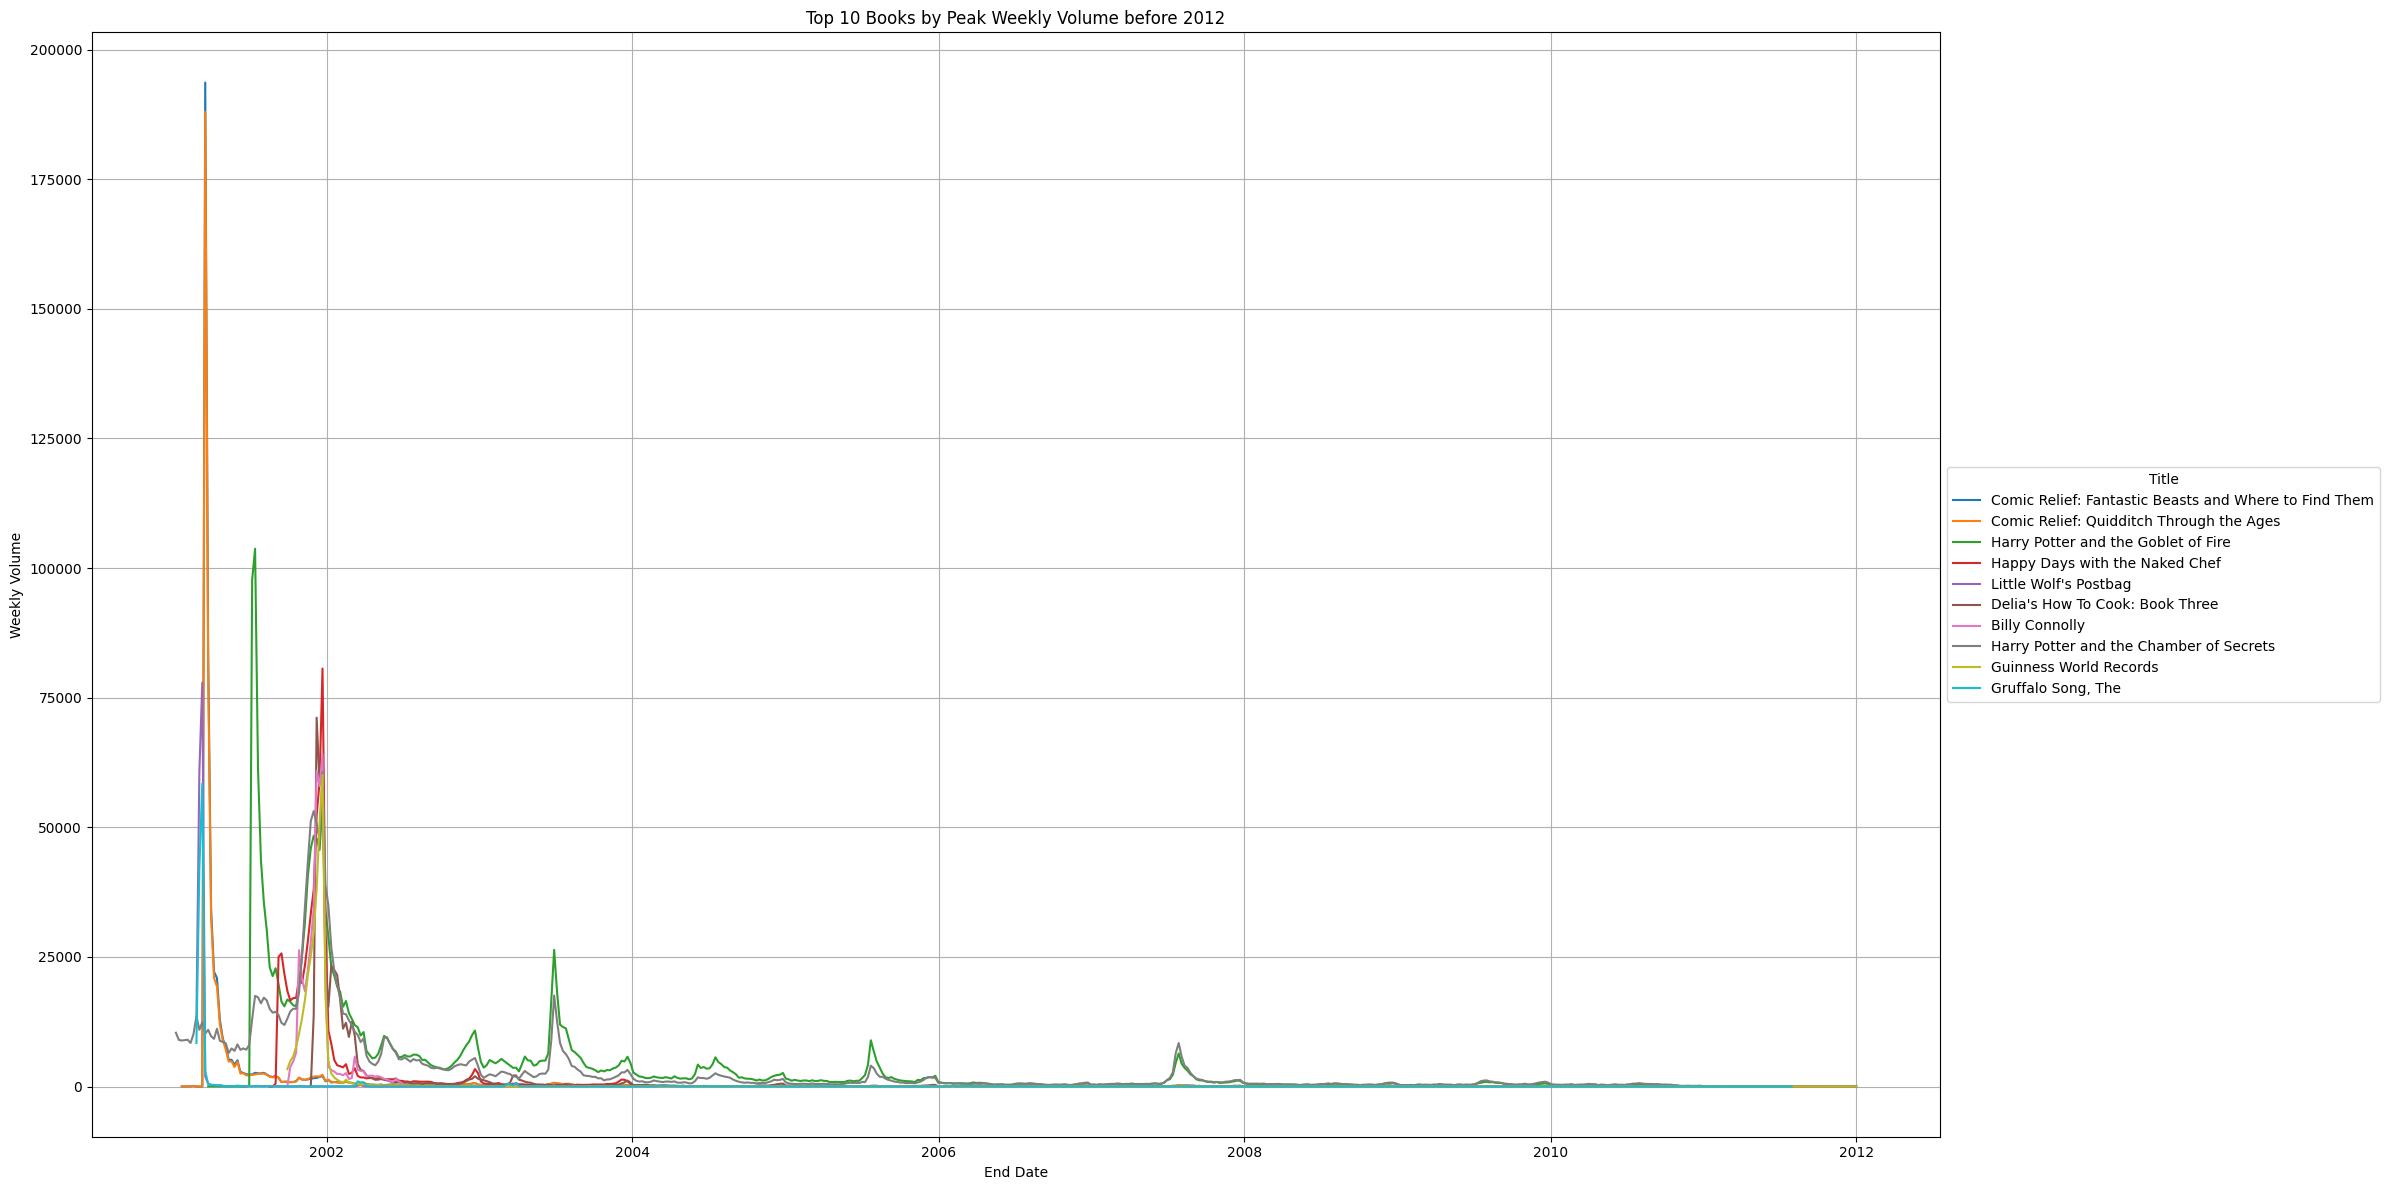

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Find the max weekly volume per ISBN
top_isbns_before = df_before_2012.groupby('ISBN')['Volume'].max().sort_values(ascending=False).head(10).index

# Step 2: Plot only those top ISBNs
fig, ax = plt.subplots(figsize=(24, 12))

for isbn in top_isbns_before:
    df_isbn = df_before_2012[df_before_2012['ISBN'] == isbn]
    title = df_isbn['Title'].iloc[0]
    ax.plot(df_isbn.index, df_isbn['Volume'], label=title)

# Step 3: Customize the plot
ax.set_title("Top 10 Books by Peak Weekly Volume before 2012")
ax.set_xlabel('End Date')
ax.set_ylabel('Weekly Volume')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')
plt.tight_layout()
plt.show()

<ipython-input-17-ad14a4b3f7c9>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


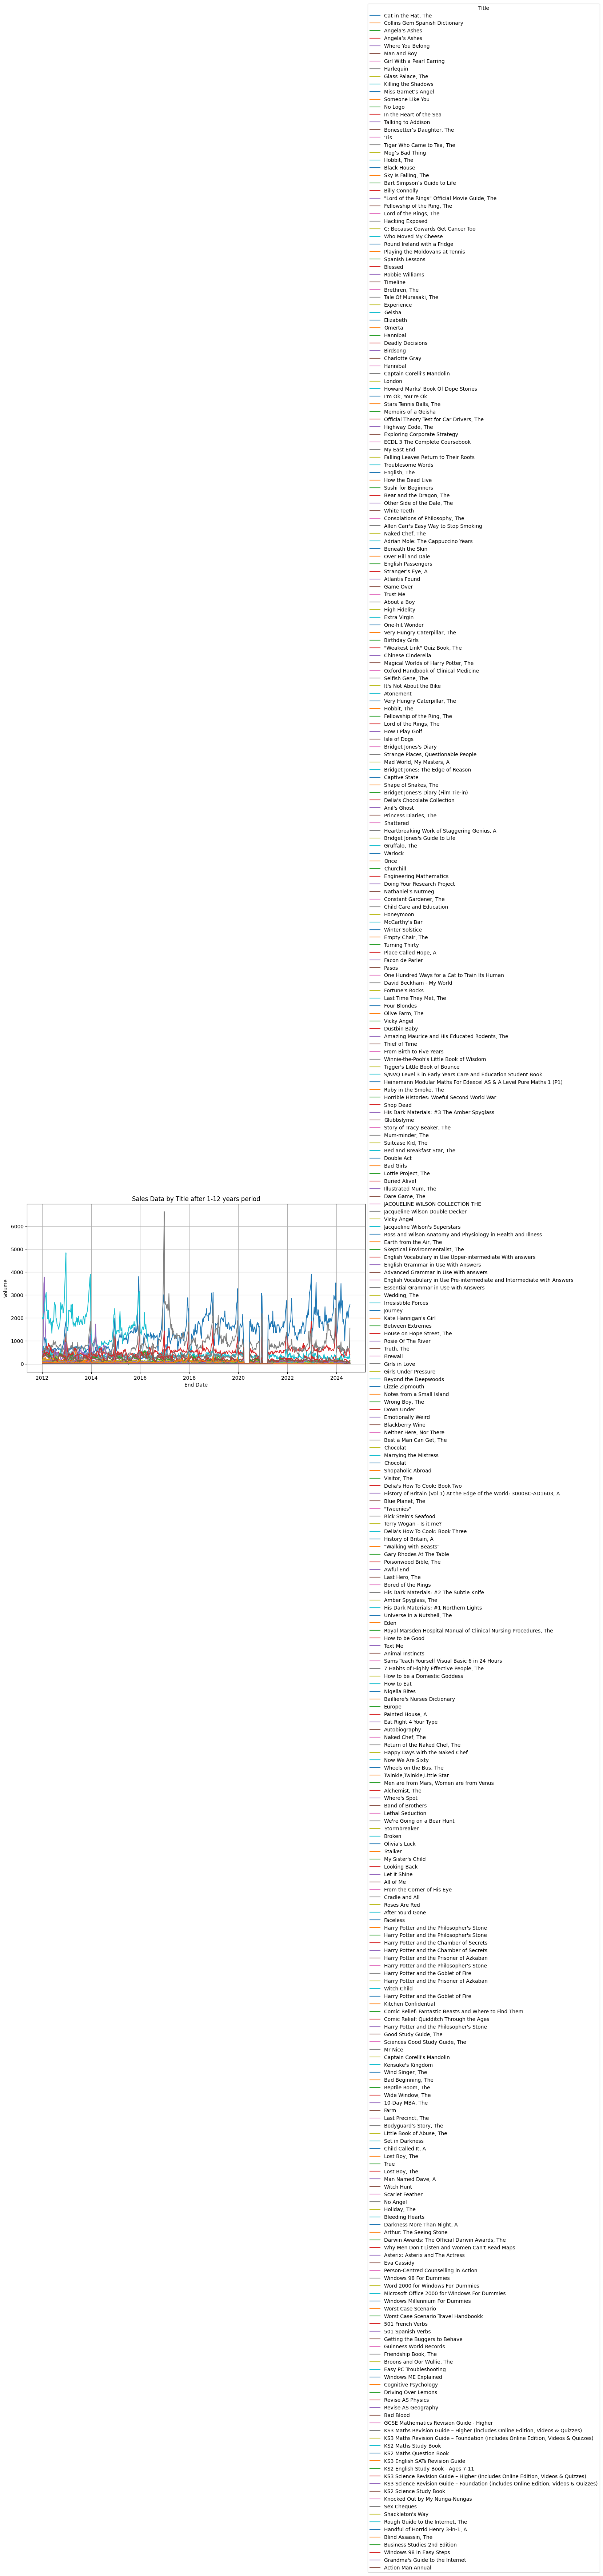

In [ ]:
# Set 'End Date' as index
df_after_2012.set_index('End Date', inplace=True)
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each unique ISBN and plot using the Title for the legend
for isbn in df_after_2012['ISBN'].unique():
    df_isbn_after = df_after_2012[df_after_2012['ISBN'] == isbn]
    title = df_isbn_after['Title'].iloc[0]  # Get the title of the book
    ax.plot(df_isbn_after.index, df_isbn_after['Volume'], label=title)

# Set labels and title
ax.set_title("Sales Data by Title after 1-12 years period")
ax.set_xlabel('End Date')
ax.set_ylabel('Volume')
ax.grid(True)

# Place legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()


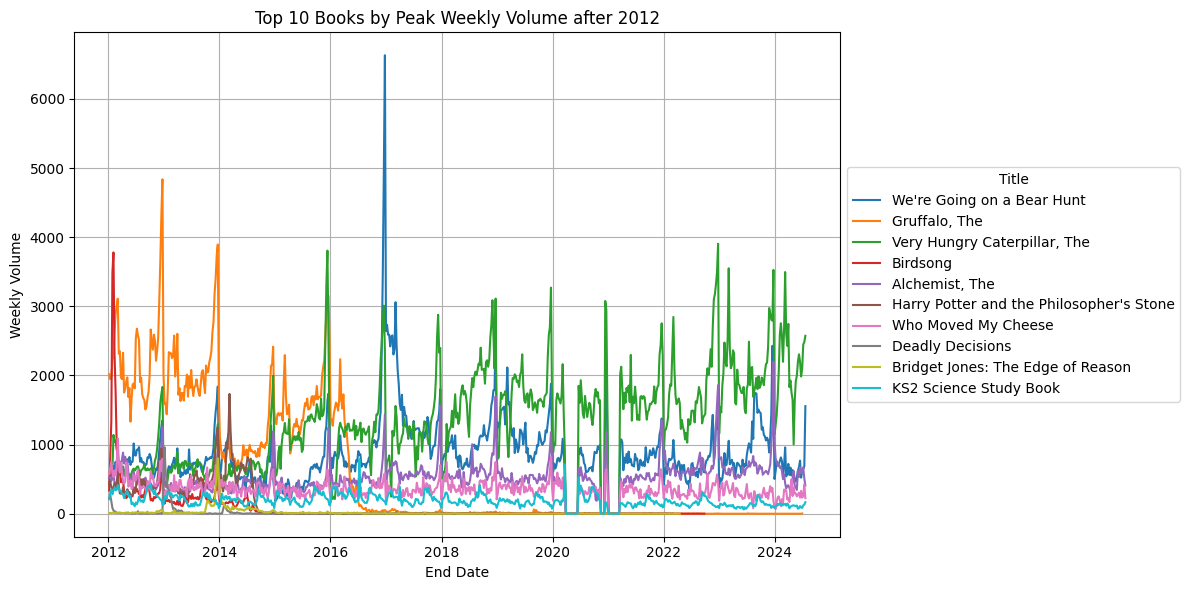

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Find the max weekly volume per ISBN
top_isbns_after = df_after_2012.groupby('ISBN')['Volume'].max().sort_values(ascending=False).head(10).index

# Step 2: Plot only those top ISBNs
fig, ax = plt.subplots(figsize=(12, 6))

for isbn in top_isbns_after:
    df_isbn = df_after_2012[df_after_2012['ISBN'] == isbn]
    title = df_isbn['Title'].iloc[0]
    ax.plot(df_isbn.index, df_isbn['Volume'], label=title)

# Step 3: Customize the plot
ax.set_title("Top 10 Books by Peak Weekly Volume after 2012")
ax.set_xlabel('End Date')
ax.set_ylabel('Weekly Volume')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')
plt.tight_layout()
plt.show()

# Do the patterns drastically change for the period 1–12 years vs the period 12–24 years? Explain why or why not with possible reasons."


The sales data shows only three books sold more than 500 copies per week after July 2024. Furthermore, comparing the 2001–2012 and 2012–2024 periods (Figs 2 and 3), a clear decline in sales volume is observed. While in the early 2000s weekly sales reached up to 200,000; the latter period peaked at just around 6,500 copies per week, even for the best-selling titles. This trend reflects the shift to digital media and a change in reading habits.

"Select two books from the list (The Alchemist and The Very Hungry Caterpillar) for further analysis.

Focus on the period >2012-01-01.

Filter the sales data for both these books to retain the date range >2012-01-01, until the final datapoint.  "

In [ ]:
df_selected = df_after_2012[df_after_2012['Title'].isin(["Alchemist, The", "Very Hungry Caterpillar, The"])]
print(df_selected)


                     ISBN                         Title  Volume
End Date                                                       
2012-01-07  9780140500875  Very Hungry Caterpillar, The       0
2012-01-14  9780140500875  Very Hungry Caterpillar, The       0
2012-01-21  9780140500875  Very Hungry Caterpillar, The       0
2012-01-28  9780140500875  Very Hungry Caterpillar, The       0
2012-02-04  9780140500875  Very Hungry Caterpillar, The       0
...                   ...                           ...     ...
2024-06-22  9780722532935                Alchemist, The     590
2024-06-29  9780722532935                Alchemist, The     627
2024-07-06  9780722532935                Alchemist, The     672
2024-07-13  9780722532935                Alchemist, The     510
2024-07-20  9780722532935                Alchemist, The     408

[1541 rows x 3 columns]


In [ ]:
######## The isbn of the caterpillar with almost 0 values need to be taken off

df_selected = df_selected[df_selected['ISBN'] != '9780140500875']
print(df_selected.head())
print(df_selected['ISBN'].unique())

                     ISBN                         Title  Volume
End Date                                                       
2012-01-07  9780241003008  Very Hungry Caterpillar, The     512
2012-01-14  9780241003008  Very Hungry Caterpillar, The     519
2012-01-21  9780241003008  Very Hungry Caterpillar, The     574
2012-01-28  9780241003008  Very Hungry Caterpillar, The     621
2012-02-04  9780241003008  Very Hungry Caterpillar, The    1140
['9780241003008' '9780722532935']


In [ ]:
print(df_selected['ISBN'].nunique())

2


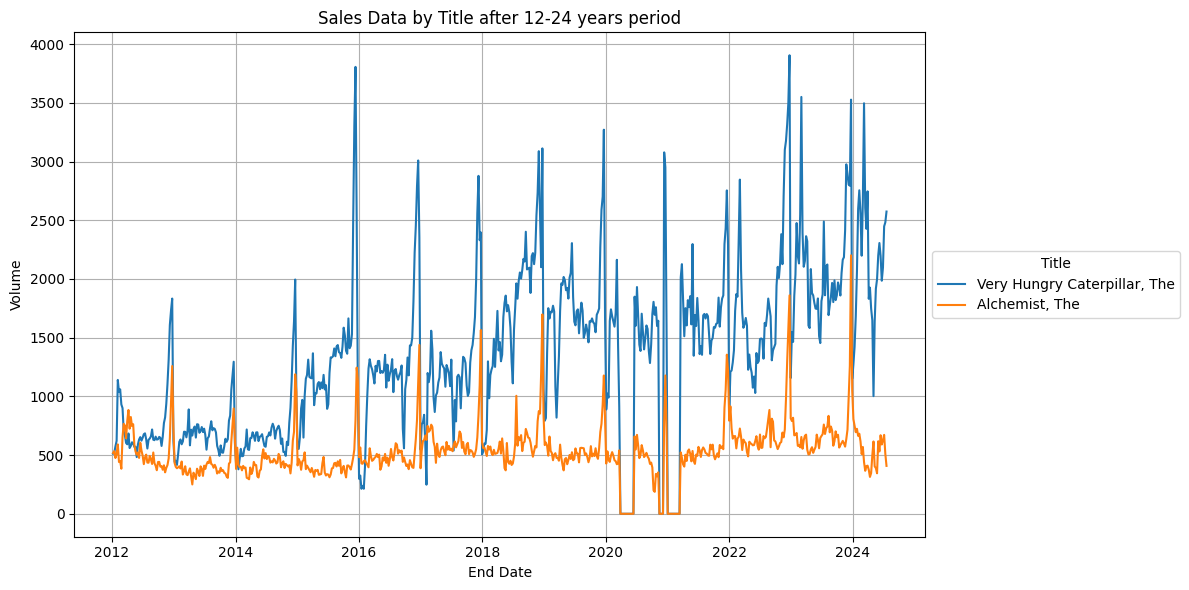

In [ ]:

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through each unique ISBN and plot using the Title for the legend
for isbn in df_selected['ISBN'].unique():
    df_isbn_after = df_selected[df_selected['ISBN'] == isbn]
    title = df_isbn_after['Title'].iloc[0]  # Get the title of the book
    ax.plot(df_isbn_after.index, df_isbn_after['Volume'], label=title)

# Set labels and title
ax.set_title("Sales Data by Title after 12-24 years period")
ax.set_xlabel('End Date')
ax.set_ylabel('Volume')
ax.grid(True)

# Place legend on the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Title')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

In [ ]:
#### separate both books
df_caterpillar = df_selected[df_selected["Title"]=='Very Hungry Caterpillar, The']
df_alchemist = df_selected[df_selected["Title"]=='Alchemist, The']

In [ ]:
print(df_caterpillar.head())

                     ISBN                         Title  Volume
End Date                                                       
2012-01-07  9780241003008  Very Hungry Caterpillar, The     512
2012-01-14  9780241003008  Very Hungry Caterpillar, The     519
2012-01-21  9780241003008  Very Hungry Caterpillar, The     574
2012-01-28  9780241003008  Very Hungry Caterpillar, The     621
2012-02-04  9780241003008  Very Hungry Caterpillar, The    1140


In [ ]:
print(df_caterpillar['Volume'])

End Date
2012-01-07     512
2012-01-14     519
2012-01-21     574
2012-01-28     621
2012-02-04    1140
              ... 
2024-06-22    1985
2024-06-29    2097
2024-07-06    2448
2024-07-13    2482
2024-07-20    2574
Name: Volume, Length: 655, dtype: int64


# Decomposition

In [ ]:
!pip install statsmodels


Decomposing 'Very Hungry Caterpillar'...


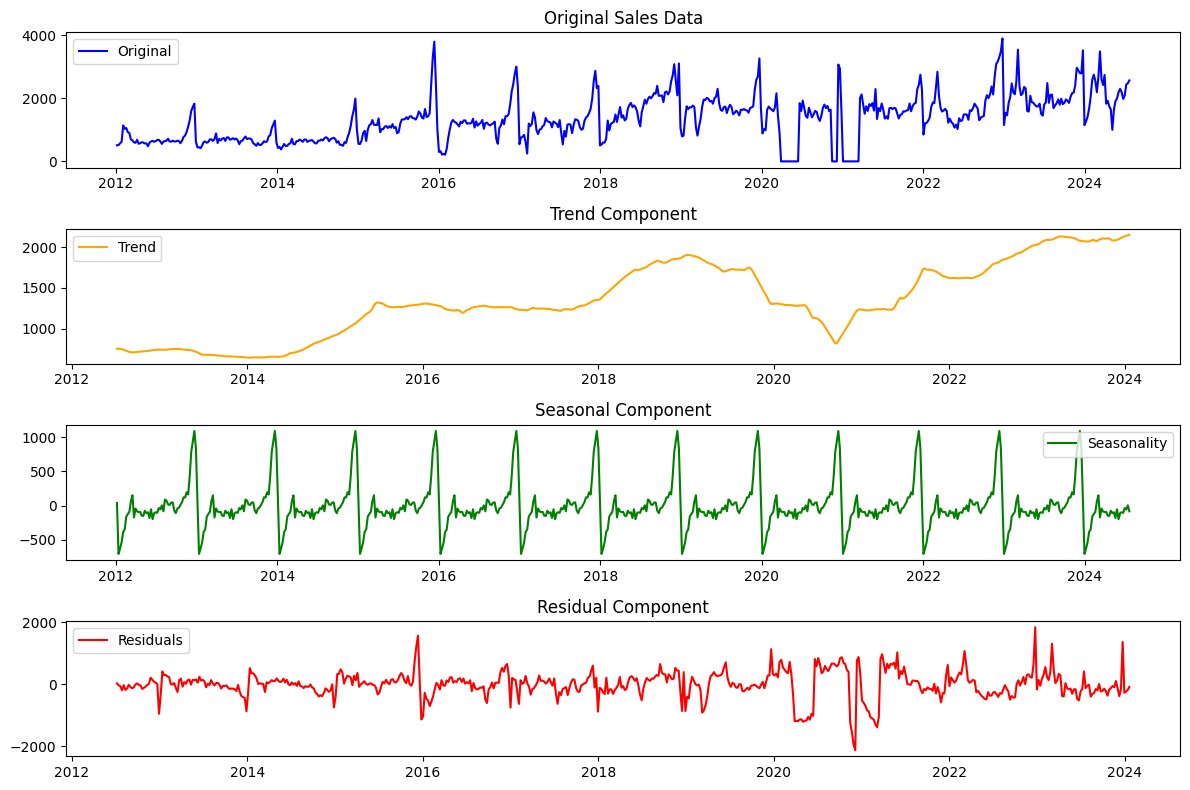

Additive decomposition enforced due to zero or negative values.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Get the sales series
sales = df_caterpillar['Volume']

# Check if there are enough data points

print("Decomposing 'Very Hungry Caterpillar'...")

try:
    # Try additive decomposition
    decomposition = seasonal_decompose(sales, model='additive', period=52)

    # Plot additive components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(sales, label='Original', color='blue')
    plt.title('Original Sales Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend Component')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonal Component')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residual Component')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error during additive decomposition: {e}")

# If sales has only positive values and high residual variation, try multiplicative
if (sales <= 0).any():
    print("Additive decomposition enforced due to zero or negative values.")
elif decomposition.resid.std() > 0.5 * sales.std():
    print("Using multiplicative decomposition.")

    decomposition = seasonal_decompose(sales, model='multiplicative', period=52)

    # Plot multiplicative components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(sales, label='Original', color='blue')
    plt.title('Original Sales Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend Component (Multiplicative)')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonal Component (Multiplicative)')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residual Component (Multiplicative)')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Additive decomposition appears suitable.")
#### keeping residuals df for ljung box test
residuals_caterpillar = pd.DataFrame({
    'Residuals': decomposition.resid
})

Performing multiplicative decomposition on 'Very Hungry Caterpillar'...


<ipython-input-27-25941923f336>:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sales = sales.interpolate(method='spline', order=3)
<ipython-input-27-25941923f336>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales = sales.ffill().bfill()


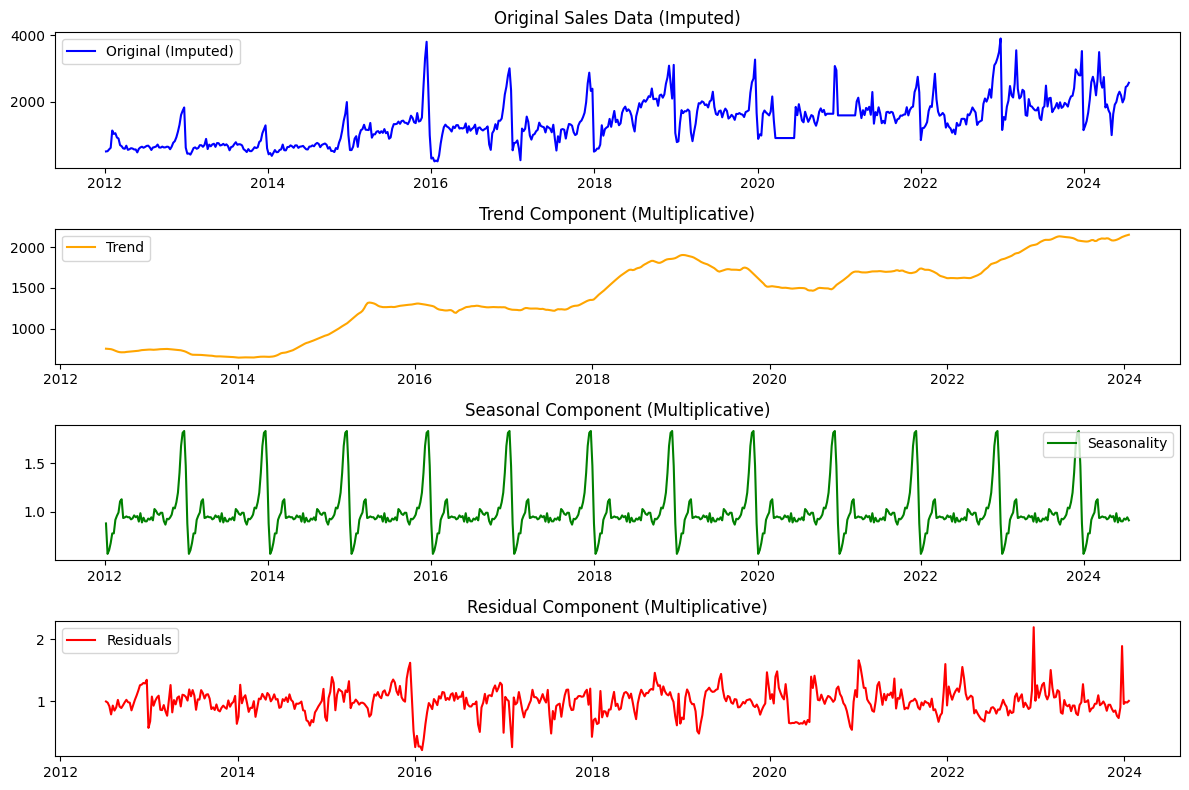

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Extract the sales volume series
sales = df_caterpillar['Volume'].copy()

# Replace 0s with NaN to allow spline interpolation
sales.replace(0, pd.NA, inplace=True)

# Interpolate missing (originally 0) values using spline
sales = sales.interpolate(method='spline', order=3)

# Final fallback to fill any remaining NaNs
sales = sales.ffill().bfill()

# Ensure no remaining NaNs or non-positive values
if sales.isna().any() or (sales <= 0).any():
    print("Error: Sales series still contains NaNs or non-positive values after imputation.")
else:
    print("Performing multiplicative decomposition on 'Very Hungry Caterpillar'...")

    try:
        decomposition = seasonal_decompose(sales, model='multiplicative', period=52)

        # Plot the decomposition
        plt.figure(figsize=(12, 8))

        plt.subplot(411)
        plt.plot(sales, label='Original (Imputed)', color='blue')
        plt.title('Original Sales Data (Imputed)')
        plt.legend(loc='best')

        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend', color='orange')
        plt.title('Trend Component (Multiplicative)')
        plt.legend(loc='best')

        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonality', color='green')
        plt.title('Seasonal Component (Multiplicative)')
        plt.legend(loc='best')

        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals', color='red')
        plt.title('Residual Component (Multiplicative)')
        plt.legend(loc='best')

        plt.tight_layout()
        plt.show()

        # Store residuals for further analysis
        residuals_caterpillar = pd.DataFrame({'Residuals': decomposition.resid})

    except ValueError as e:
        print(f"Error during decomposition: {e}")




Decomposing 'The Alchemist'...


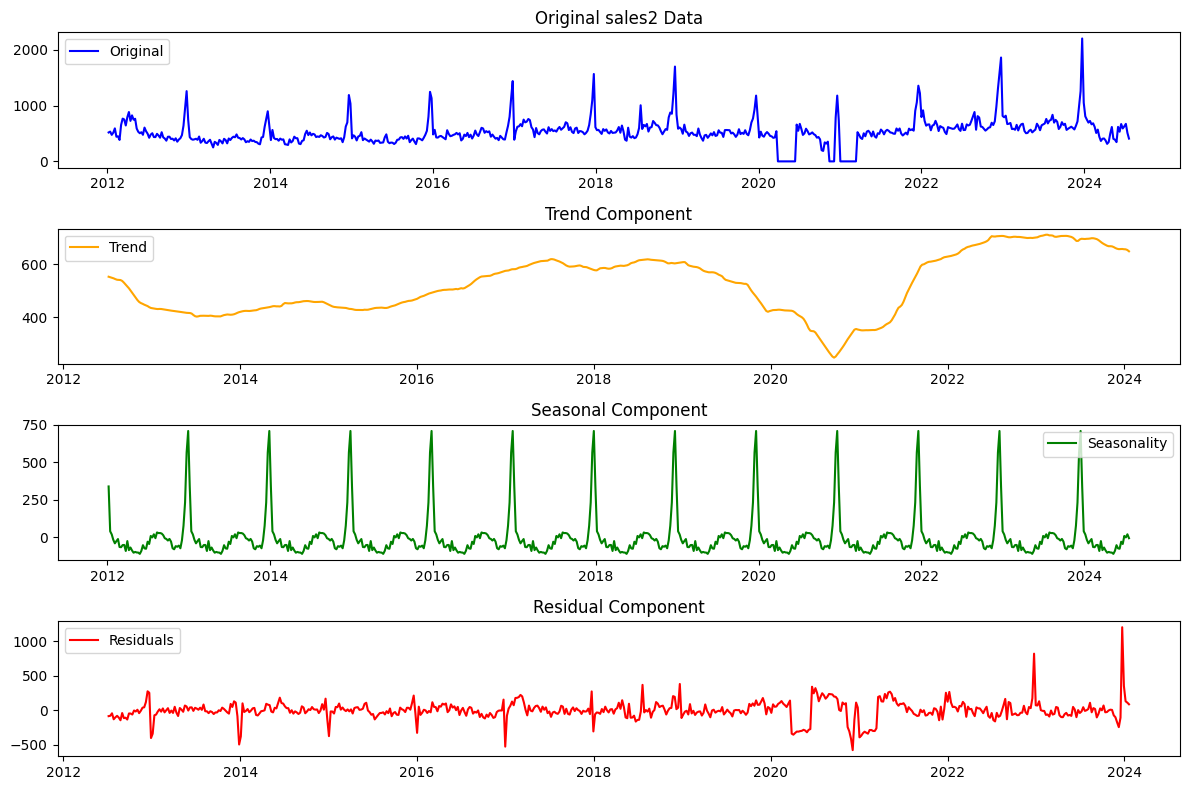

Additive decomposition enforced due to zero or negative values.


In [ ]:
# Get the sales2 series
sales2 = df_alchemist['Volume']

# Check if there are enough data points

print("Decomposing 'The Alchemist'...")

try:
    # Try additive decomposition
    decomposition = seasonal_decompose(sales2, model='additive', period=52)

    # Plot additive components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(sales2, label='Original', color='blue')
    plt.title('Original sales2 Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend Component')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonal Component')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residual Component')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error during additive decomposition: {e}")

# If sales2 has only positive values and high residual variation, try multiplicative
if (sales2 <= 0).any():
    print("Additive decomposition enforced due to zero or negative values.")
elif decomposition.resid.std() > 0.5 * sales2.std():
    print("Using multiplicative decomposition.")

    decomposition = seasonal_decompose(sales2, model='multiplicative', period=52)

    # Plot multiplicative components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(sales2, label='Original', color='blue')
    plt.title('Original sales2 Data')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend Component (Multiplicative)')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonality', color='green')
    plt.title('Seasonal Component (Multiplicative)')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residual Component (Multiplicative)')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Additive decomposition appears suitable.")


"Perform ACF and PACF on both books.

Comment on the results and what they indicate."

Text(0.5, 1.0, 'ACF for The Alchemist')

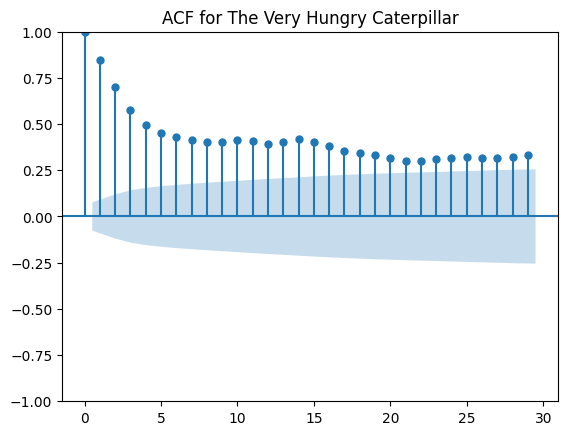

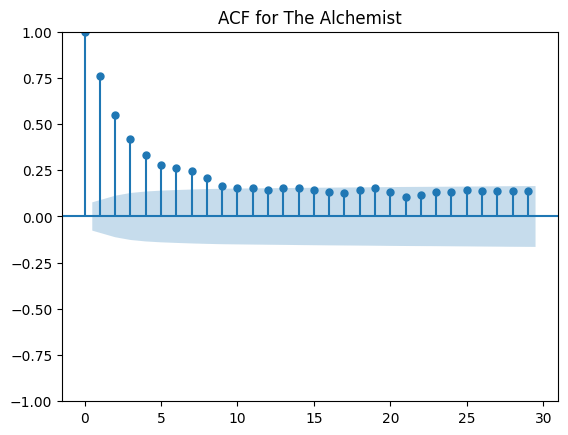

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm

# ACF default arguments.
# x                     : The time series object.
# lags=None             : Number of lags to calculate. If None selects automatically.
# alpha=0.05            : Confidence level to use for insignificance region.
# adjusted=False        : Related to calculation method.
# fft=False             : Related to calculation method (fast fourier transform).
# missing='none'        : How to treat missing values.
# zero=True             : Return 0-lag autocorrelation?
# bartlett_confint=True : Related to calculation of insignificance region.
sm.graphics.tsa.plot_acf(df_caterpillar.Volume);
plt.title("ACF for The Very Hungry Caterpillar")

sm.graphics.tsa.plot_acf(df_alchemist.Volume);
plt.title("ACF for The Alchemist")

Text(0.5, 1.0, 'PACF for The Alchemist')

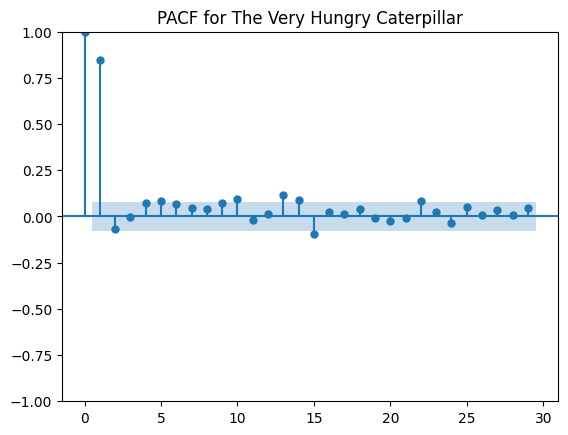

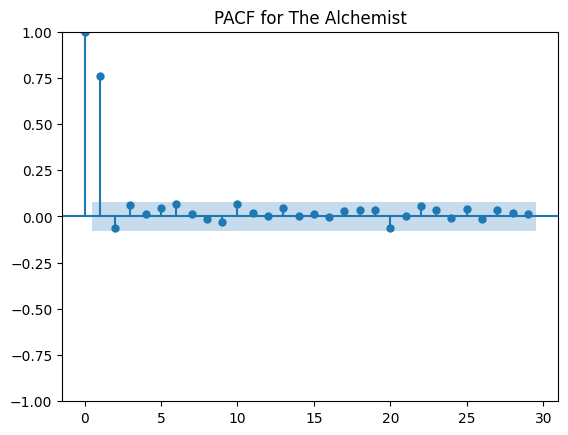

In [ ]:
# PACF default arguments.
# x           : The time series object
# lags=None   : Number of lags to calculate. If None selects automatically
# alpha=0.05  : Confidence level to use for insignificance region
# method='ywm': Related to calculation method
# zero=True   : Return 0-lag autocorrelation?
sm.graphics.tsa.plot_pacf(df_caterpillar.Volume);
plt.title("PACF for The Very Hungry Caterpillar")

sm.graphics.tsa.plot_pacf(df_alchemist.Volume);
plt.title("PACF for The Alchemist")


For both books, the ACF plots show autocorrelation that gradually decays. In The Very Hungry Caterpillar, nearly all visible lags remain outside the insignificance region, suggesting that past values have a prolonged influence on future values. In contrast, for The Alchemist, autocorrelations fall within the insignificance bounds around lag 10, indicating that only the first few lags significantly influence future values.

In the PACF plots, both books show the first lag clearly outside the insignificance region. For The Alchemist, all subsequent lags fall within the bounds, suggesting a simple autoregressive structure. For The Very Hungry Caterpillar, a few additional lags — such as the 10th, 14th, and 15th — slightly exceed the bounds, possibly indicating weak seasonal effects or more complex autoregressive behavior.

LJUNG BOX TEST OPTIONAL

We can use the ljung box test to check for autocorrelation for lags greater than 0.

H0 = Time series is independently distributed meaning there are no autoccorrelations on the tested lags
H1 = There is autocorrelation at one or more of the tested lags.

if p<0.005 then H0 is rejected
if p>0.005 then H0 is not rejected

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print("Ljung box test output for The Very Hungry Caterpillar", acorr_ljungbox(df_caterpillar.Volume),)
print("Ljung box test output for The Alchemist", acorr_ljungbox(df_alchemist.Volume),)

Ljung box test output for The Very Hungry Caterpillar         lb_stat      lb_pvalue
1    473.486785  5.585020e-105
2    796.770042  9.629054e-174
3   1016.174191  5.577365e-220
4   1178.481171  7.363669e-254
5   1313.552900  7.397646e-282
6   1436.218558  3.480674e-307
7   1551.241938   0.000000e+00
8   1660.261848   0.000000e+00
9   1768.298808   0.000000e+00
10  1883.629584   0.000000e+00
Ljung box test output for The Alchemist        lb_stat      lb_pvalue
1   379.081861   1.971765e-84
2   578.082439  2.957967e-126
3   695.569158  1.917828e-150
4   769.205521  3.591563e-165
5   821.405473  2.705878e-175
6   867.468386  4.046255e-184
7   906.989910  1.485573e-191
8   936.285520  8.393678e-197
9   954.299344  1.228480e-199
10  970.371488  4.503160e-202


The Ljung-Box test results for both time series (The Very Hungry Caterpillar and The Alchemist) show p-values below 0.005 across all tested lags, indicating strong and statistically significant autocorrelation. This suggests that past values systematically influence future sales. Consequently, forecasting models that assume independence between observations (e.g., mean or naïve forecasts) are inappropriate. Instead, time series models such as ARIMA, which explicitly account for autocorrelation, are more suitable for capturing the temporal dynamics observed in the data.

In [ ]:
print(residuals_alchemist)

            Residuals
End Date             
2012-01-07 -54.282904
2012-01-14 -46.525663
2012-01-21 -51.821574
2012-01-28 -38.914513
2012-02-04  -7.572338
...               ...
2024-06-22  61.521201
2024-06-29  68.191825
2024-07-06  85.447835
2024-07-13 -19.840480
2024-07-20 -38.833763

[655 rows x 1 columns]


Text(0.5, 1.0, 'PACF on residuals for The Alchemist')

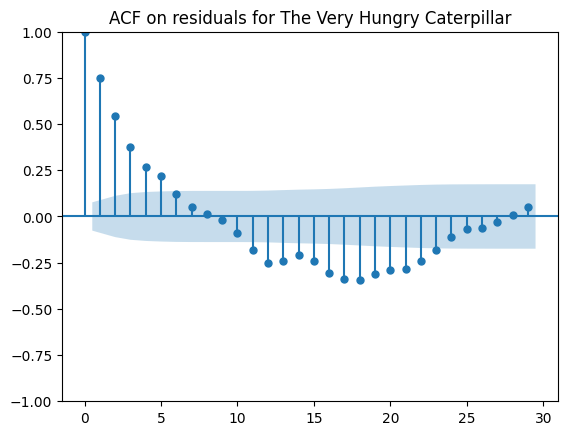

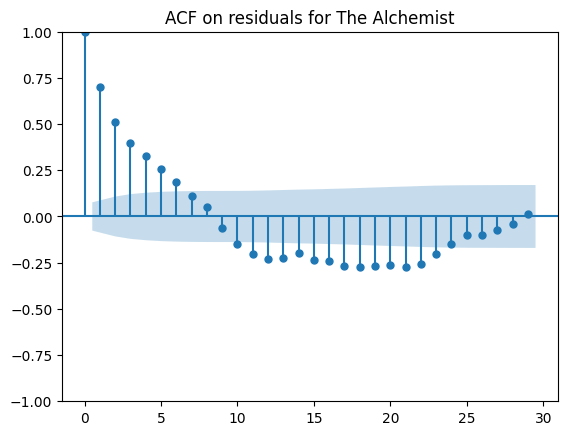

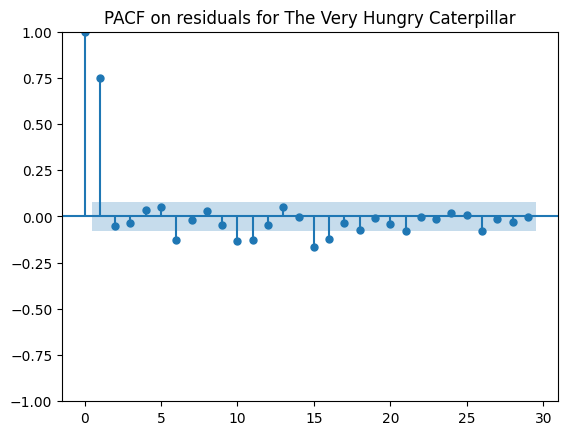

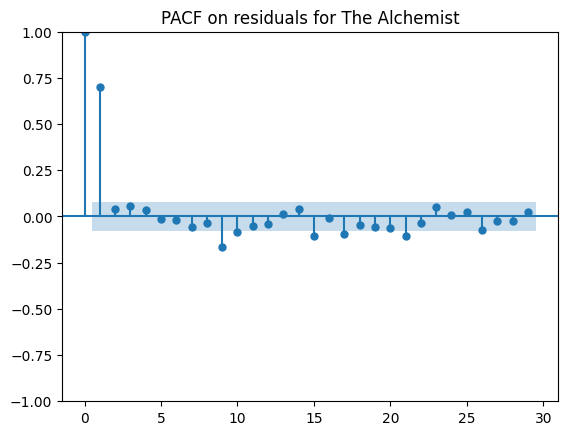

In [ ]:
# PACF default arguments.
# x           : The time series object
# lags=None   : Number of lags to calculate. If None selects automatically
# alpha=0.05  : Confidence level to use for insignificance region
# method='ywm': Related to calculation method
# zero=True   : Return 0-lag autocorrelation?
sm.graphics.tsa.plot_acf(residuals_caterpillar);
plt.title("ACF on residuals for The Very Hungry Caterpillar")

sm.graphics.tsa.plot_acf(residuals_alchemist);
plt.title("ACF on residuals for The Alchemist")

sm.graphics.tsa.plot_pacf(residuals_caterpillar);
plt.title("PACF on residuals for The Very Hungry Caterpillar")

sm.graphics.tsa.plot_pacf(residuals_alchemist);
plt.title("PACF on residuals for The Alchemist")


In [ ]:

print("Ljung box test output for The Very Hungry Caterpillar Residuals", acorr_ljungbox(residuals_caterpillar.Residuals),)
print("Ljung box test output for The Alchemist Residuals", acorr_ljungbox(residuals_alchemist.Residuals),)

Ljung box test output for The Very Hungry Caterpillar Residuals        lb_stat      lb_pvalue
1   370.466862   1.480962e-82
2   563.412959  4.533466e-123
3   655.506526  9.320862e-142
4   703.716490  5.463943e-151
5   735.158664  1.225987e-156
6   745.225449  1.047529e-157
7   746.919358  5.253691e-157
8   747.064986  5.238731e-156
9   747.316624  4.616895e-155
10  752.378715  3.540648e-155
Ljung box test output for The Alchemist Residuals        lb_stat      lb_pvalue
1   322.397402   4.352123e-72
2   493.431912  7.122324e-108
3   598.685446  1.942542e-129
4   669.332329  1.521385e-143
5   712.116376  1.178602e-151
6   735.396404  1.390001e-155
7   743.813088  2.457366e-156
8   745.613803  1.076019e-155
9   748.310139  2.822442e-155
10  763.421832  1.500879e-157


# "Check for stationarity of the data for both books.

# Comment on the results and what they indicate."

In [ ]:
df_alchemist.head()

ISBN           Title  Volume
End Date                                         
2012-01-07  9780722532935  Alchemist, The     518
2012-01-14  9780722532935  Alchemist, The     533
2012-01-21  9780722532935  Alchemist, The     475
2012-01-28  9780722532935  Alchemist, The     514
2012-02-04  9780722532935  Alchemist, The     591

In [ ]:
# Testing for stationarity - ADF Test

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_caterpillar["Volume"])
print('p-value. caterpillar data:', adf_result[1])

adf_result = adfuller(df_alchemist["Volume"])
print('p-value. alchemist data:', adf_result[1])

adf_result = adfuller(residuals_caterpillar)
print('p-value, caterpillar residuals data:', adf_result[1])

adf_result = adfuller(residuals_alchemist)
print('p-value, alchemist residuals data:', adf_result[1])

p-value. caterpillar data: 0.02961602152717597
p-value. alchemist data: 4.1399509971749606e-13
p-value, caterpillar residuals data: 3.250651536585659e-14
p-value, alchemist residuals data: 1.973785437568053e-13


A p-value < 0.05 suggests the series is stationary.

A p-value >= 0.05 suggests the series is non-stationary.

It seems like the 4 time series are stationary, this means their mean and variance remain constant, making them suitable for SARIMA statistical modeling without differencing.




## "Perform Auto ARIMA on both books.

## The forecast horizon is the final 32 weeks of data. All prior data (from 2012-01-01 onwards) can be used as the training data.

## Set reasonable bounds for Auto ARIMA's various parameters so that Auto ARIMA can identify the most suitable model."

In [ ]:
!pip install pmdarima

Preprocess data and import libraries for autoarima

In [ ]:
pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tenso

In [ ]:
from matplotlib.patches import Rectangle
import statsmodels.graphics.api as smgraphics
from statsmodels.tsa.stattools import adfuller as adf

from pmdarima.arima import auto_arima




In [ ]:
# Define forecast horizon
forecast_horizon = 32

# Training and test splits
train_caterpillar = df_caterpillar['Volume'][:-forecast_horizon]
test_caterpillar = df_caterpillar['Volume'][-forecast_horizon:]

train_alchemist = df_alchemist['Volume'][:-forecast_horizon]
test_alchemist = df_alchemist['Volume'][-forecast_horizon:]


In [ ]:
from pmdarima.arima import auto_arima

# Caterpillar
model_caterpillar = auto_arima(
    train_caterpillar,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=0,  # No non-seasonal differencing
    seasonal=True,
    m=52,  # Weekly seasonality
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    D=0,  # No seasonal differencing
    stepwise=True,
    suppress_warnings=True,
    stationary=True, information_criterion='aic',
    error_action="ignore", trace=True
)
print("Best ARIMA model for The Very Hungry Caterpillar:")
print(model_caterpillar.summary())  # or just: print(model_caterpillar)

# Get the best model parameters
print(f"Best Caterpillar ARIMA Model: {model_caterpillar.order}")



Previous code output:  ARIMA(1,0,0)(2,0,1)[52]             : AIC=9028.676, Time=71.68 sec

Best model:  ARIMA(1,0,0)(2,0,1)[52] intercept
Total fit time: 1245.600 seconds
Best ARIMA model for The Very Hungry Caterpillar:
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  623
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 52)   Log Likelihood               -4494.702
Date:                              Thu, 08 May 2025   AIC                           9001.404
Time:                                      03:51:32   BIC                           9028.012
Sample:                                  01-07-2012   HQIC                          9011.745
                                       - 12-09-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     75.8949     25.740      2.948      0.003      25.445     126.345
ar.L1          0.8465      0.017     50.477      0.000       0.814       0.879
ar.S.L52       0.4901      0.183      2.677      0.007       0.131       0.849
ar.S.L104      0.1347      0.085      1.580      0.114      -0.032       0.302
ma.S.L52      -0.1827      0.181     -1.011      0.312      -0.537       0.172
sigma2      1.061e+05   3281.204     32.325      0.000    9.96e+04    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              6342.31
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               5.04   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.50
===================================================================================


print("Best ARIMA model for The Very Hungry Caterpillar:")
print(model_caterpillar.summary())  # or just: print(model_caterpillar)

Get the best model parameters
print(f"Best Caterpillar ARIMA Model: {model_caterpillar.order}")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#I fitted the best model manually since i lost the actual output of the previous cell but kept the results
# Fit the best ARIMA model manually
model_caterpillar = SARIMAX(
    train_caterpillar,
    order=(1, 0, 0),
    seasonal_order=(2, 0, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Print model summary
print(model_caterpillar.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                               Volume   No. Observations:                  623
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 52)   Log Likelihood               -3780.701
Date:                              Fri, 09 May 2025   AIC                           7571.403
Time:                                      00:45:32   BIC                           7592.653
Sample:                                  01-07-2012   HQIC                          7579.729
                                       - 12-09-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9083      0.015     58.819      0.000       0.878       0.939
ar.S.L52       0.50

In [ ]:
# Alchemist
model_alchemist = auto_arima(
    train_alchemist,
    start_p=0, max_p=1,
    start_q=0, max_q=1,
    d=0,
    seasonal=True,
    m=52,
    start_P=0, max_P=1,
    start_Q=0, max_Q=1,
    D=0,
    stepwise=True,
    suppress_warnings=True,
    stationary=True, information_criterion='aic',
    error_action="ignore", trace=True, n_fits=10
)
print("\nBest ARIMA model for The Alchemist:")
print(model_alchemist.summary())
# Get the best model parameters
print(f"Best alchemist ARIMA Model: {model_alchemist.order}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=8485.150, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=61.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=7988.526, Time=39.80 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=9669.899, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=8110.153, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[52] intercept   : AIC=7958.835, Time=88.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=7942.434, Time=52.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=8316.986, Time=37.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=7678.056, Time=71.64 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=7928.247, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=7691.584, Time=82.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=7784.215, Time=26.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[52]             : AIC=7706.061, Time=31.34 sec

Best model:  ARIMA(1,0,1)(1,0,0)[52] intercept
Total fit time: 492.541 seconds

Best ARIMA model for The Alchemist:
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  623
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood               -3834.028
Date:                             Thu, 08 May 2025   AIC                           7678.056
Time:                                     23:17:41   BIC                           7700.228
Sample:                                 01-07-2012   HQIC                          7686.672
                                      - 12-09-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the best ARIMA model manually (as found by Auto ARIMA)
model_alchemist = SARIMAX(
    train_alchemist,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 0, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Print model summary
print(model_alchemist.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                              Volume   No. Observations:                  623
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood               -3511.412
Date:                             Fri, 09 May 2025   AIC                           7030.824
Time:                                     18:25:38   BIC                           7048.207
Sample:                                 01-07-2012   HQIC                          7037.606
                                      - 12-09-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9373      0.014     68.397      0.000       0.910       0.964
ma.L1         -0.2173      

# Comment on the best model provided by Auto ARIMA for both books.

-The Very Hungry Caterpillar
Best model: ARIMA(1, 0, 0)(2, 0, 1)[52]

AIC: 9001.404

Log-Likelihood: -4494.702

Seasonality: Weekly (m=52), with Seasonal AR(2) and MA(1) components

Key coefficients:

AR(1) and Seasonal AR(52) are statistically significant

Seasonal AR(104) is marginally significant (p = 0.114)

Seasonal MA(52) is not significant (p = 0.312)

Residuals are uncorrelated (Ljung-Box p = 0.78)


- The Alchemist
Best model: ARIMA(1, 0, 1)(1, 0, 0)[52]

AIC: 7678.056

Log-Likelihood: -3834.028

Seasonality: Weekly (m=52), with a seasonal AR(1) component

Key coefficients:

AR(1) and Seasonal AR(52) are strongly significant (p < 0.001)

MA(1) is significant (p = 0.007), contributing meaningfully

Residuals are uncorrelated (Ljung-Box p = 0.80)

The ARIMA model for The Very Hungry Caterpillar captures some temporal structure, but exhibits several issues. Although key AR terms are statistically significant and residual autocorrelation is well-behaved, the model suffers from non-normal, heteroskedastic residuals and includes non-significant seasonal components. This suggests potential misspecification and limits its forecasting reliability, especially in the presence of outliers or structural shifts.

In contrast, The Alchemist's ARIMA model is more robust. All key coefficients are significant, and residuals show no autocorrelation, indicating a good fit. While non-normality and heteroskedasticity persist, they are more common and less impactful here. Overall, the model for The Alchemist appears more stable and reliable.


# "Find the residuals of the 'best' model for both books.

# Comment on the residuals."

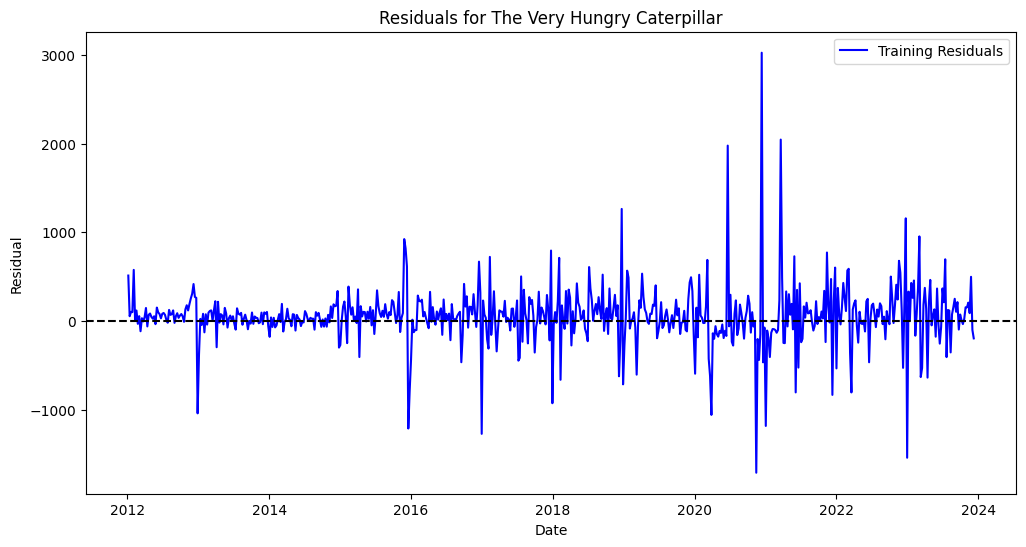

In [ ]:
# Get fitted values from the model (in-sample predictions)
fitted_values_caterpillar = model_caterpillar.fittedvalues

# Calculate residuals manually (actual - fitted)
residuals_caterpillar = train_caterpillar - fitted_values_caterpillar

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(train_caterpillar.index, residuals_caterpillar, label='Training Residuals', color='blue')
plt.title("Residuals for The Very Hungry Caterpillar")
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()


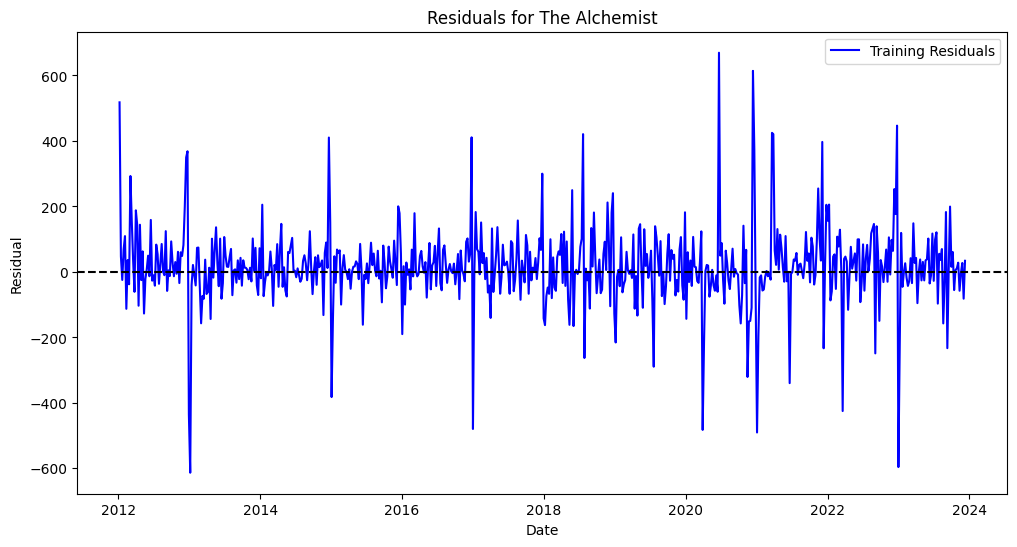

In [ ]:
# Get fitted values from the model (in-sample predictions)
fitted_values_alchemist = model_alchemist.fittedvalues

# Calculate residuals manually (actual - fitted)
residuals_alchemist = train_alchemist - fitted_values_alchemist

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(train_alchemist.index, residuals_alchemist, label='Training Residuals', color='blue')
plt.title("Residuals for The Alchemist")
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()


Comment:

When analyzing the residuals of the ARIMA models for the weekly predictions, we observe that the variance of the residuals for The Very Hungry Caterpillar increases over time. This heteroscedasticity may hinder the ARIMA model’s ability to capture nonlinear patterns in the book’s sales time series.



"Use the best model to predict the final 32 weeks of data.

Plot the prediction along with the confidence intervals for both books."

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Forecast the final 32 weeks (true forecasting, future values)
forecast_caterpillar = model_caterpillar.get_forecast(steps=forecast_horizon)

# Get forecasted values and confidence intervals for future periods
forecast = forecast_caterpillar.predicted_mean
conf_int = forecast_caterpillar.conf_int()

# Create a date range for the forecast (future dates)
forecast_index = pd.date_range(start=sales.index[-1] + pd.Timedelta(weeks=1), periods=forecast_horizon, freq='W-SAT')

# Calculate MAE and MAPE
mae = mean_absolute_error(test_caterpillar, forecast)
mape = mean_absolute_percentage_error(test_caterpillar, forecast) * 100

print(f"Mean Absolute Error caterpillar (MAE): {mae}")
print(f"Mean Absolute Percentage Error caterpillar (MAPE): {mape:.2f}%")

Mean Absolute Error caterpillar (MAE): 760.6674378958651
Mean Absolute Percentage Error caterpillar (MAPE): 33.16%


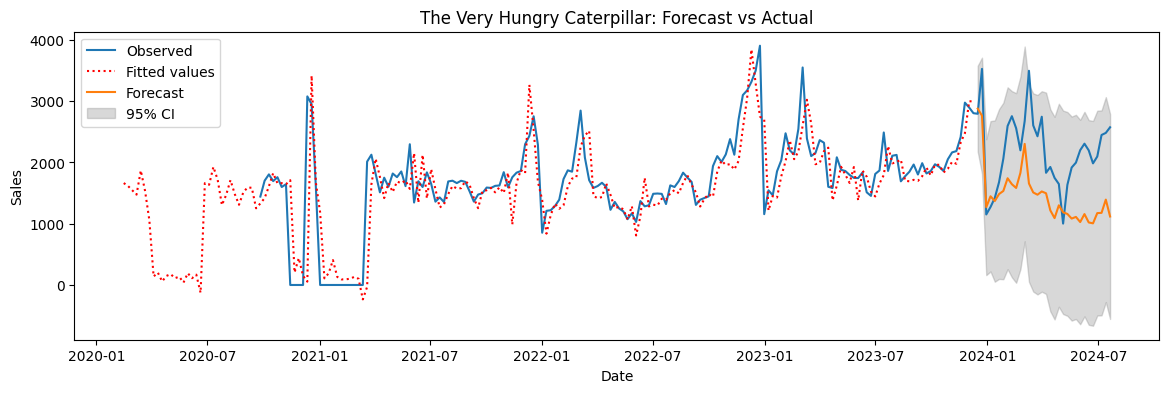

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error



### make predictions
forecast_object = model_caterpillar.get_forecast(steps=forecast_horizon)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Ajustar índice del pronóstico al de test_caterpillar
forecast.index = test_caterpillar.index
conf_int.index = test_caterpillar.index

# Visualización
N_plot = 200
plt.figure(figsize=(14, 4))
plt.plot(df_caterpillar.index[-N_plot:], df_caterpillar['Volume'][-N_plot:], label='Observed')
plt.plot(train_caterpillar.index[-N_plot:], model_caterpillar.fittedvalues[-N_plot:], ':', c='red', label='Fitted values')
plt.plot(forecast.index, forecast, label='Forecast')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3, label='95% CI')

plt.title('The Very Hungry Caterpillar: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Forecast the final 32 weeks (true forecasting, future values)
forecast_alchemist = model_alchemist.get_forecast(steps=forecast_horizon)

# Get forecasted values and confidence intervals for future periods
forecast = forecast_alchemist.predicted_mean
conf_int = forecast_alchemist.conf_int()

# Create a date range for the forecast (future dates)
forecast_index = pd.date_range(start=sales.index[-1] + pd.Timedelta(weeks=1), periods=forecast_horizon, freq='W-SAT')

# Calculate MAE and MAPE
mae = mean_absolute_error(test_alchemist, forecast)
mape = mean_absolute_percentage_error(test_alchemist, forecast) * 100

print(f"Mean Absolute Error alchemist (MAE): {mae}")
print(f"Mean Absolute Percentage Error alchemist (MAPE): {mape:.2f}%")

Mean Absolute Error alchemist (MAE): 146.6500558988384
Mean Absolute Percentage Error alchemist (MAPE): 20.60%


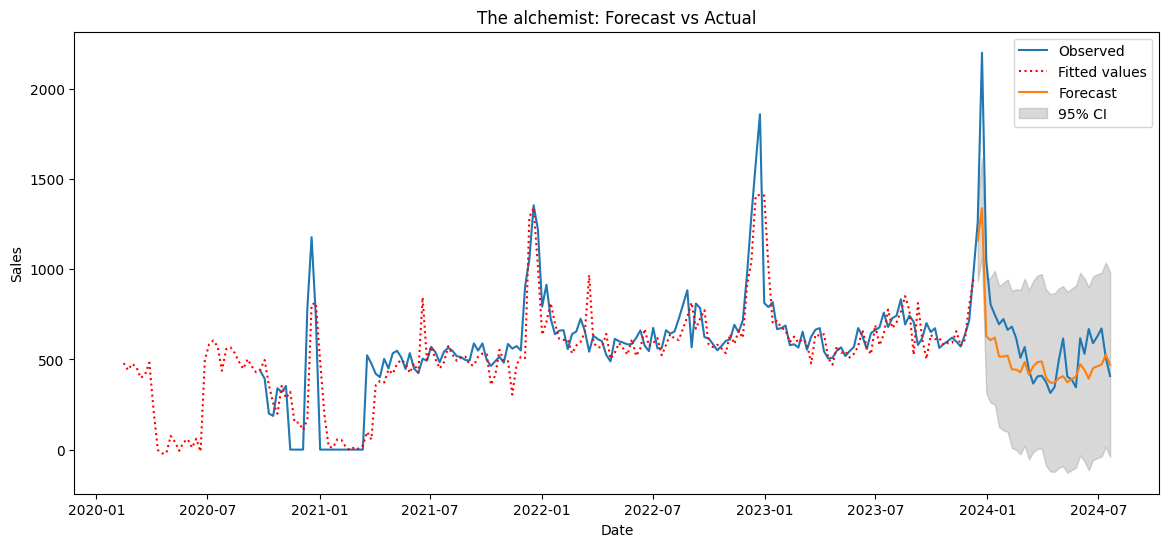

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error



### make predictions
forecast_object = model_alchemist.get_forecast(steps=forecast_horizon)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Ajustar índice del pronóstico al de test_alchemist
forecast.index = test_alchemist.index
conf_int.index = test_alchemist.index

# Visualización
N_plot = 200
plt.figure(figsize=(14, 6))
plt.plot(df_alchemist.index[-N_plot:], df_alchemist['Volume'][-N_plot:], label='Observed')
plt.plot(train_alchemist.index[-N_plot:], model_alchemist.fittedvalues[-N_plot:], ':', c='red', label='Fitted values')
plt.plot(forecast.index, forecast, label='Forecast')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3, label='95% CI')

plt.title('The alchemist: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Comment on how the prediction compares with the actual values:

Auto ARIMA successfully identified appropriate seasonal ARIMA models for both datasets. While both models pass residual checks, having p-values under 0.05 on the Ljung-Box test, and followed the overall shape of the actual values. The Alchemist exhibits more predictable sales, reflected in its lower MAPE (20.60%). This suggests it is more suited for ARIMA-style forecasting. In contrast, The Very Hungry Caterpillar shows a higher MAPE (33.16%), indicating that more advanced or nonlinear models may be more appropriate. Additionally, the residual plots reveal greater variance in The Caterpillar model, suggesting that its ARIMA specification may not fully capture the underlying dynamics of the series.

In [ ]:
#### sfae df_Aalchemist and df_caterpillar
df_alchemist.to_csv("/content/drive/MyDrive/topic/df_alchemist.csv")
df_caterpillar.to_csv("/content/drive/MyDrive/topic/df_caterpillar.csv")


## XGBOOST


In [ ]:
import sktime
print(sktime.__version__)


0.37.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Downgrading numpy
!pip install numpy==1.24.0

  Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.
pymc 5.22.0 requires n

In [ ]:
!pip install --upgrade --force-reins

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
!pip install --upgrade sktime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer # Or just: import xgboost as xgb and then use xgb.XGBRegressor()
import numpy as np

In [ ]:
# Load the relevant helper functions from sktime.
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender


"Prepare the data to feed into the machine learning models.

The forecast horizon is 32 weeks. The training data consists of all prior data, up to 2012-01-01. "

In [ ]:
!pip install tensorflow==2.15.1

  Using cached tensorflow-2.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: keras
    Found existing installation: keras 3.9.2
    Uninstalling keras-3.9.2:
      Successfully uninstalled keras-3.9.2
  Attempting uninstall: tensorb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [ ]:
# create lag features to feed xgboost
def create_lag_features(df, window_length):
    """Create lag features for the time series."""
    df_lag = pd.DataFrame()
    for i in range(1, window_length + 1):
        df_lag[f'lag_{i}'] = df['Volume'].shift(i)
    df_lag['Volume'] = df['Volume']
    return df_lag.dropna()

In [ ]:

# Custom function to calculate MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Custom scoring function combining MAE and MAPE
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MAPE': make_scorer(mape, greater_is_better=False)
}

In [ ]:

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('xgb', XGBRegressor())  # XGBoost Regressor
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'xgb__n_estimators': [50, 100, 200],  # Number of trees
    'xgb__learning_rate': [0.02, 0.03, 0.05, 0.1],  # Learning rate
    'xgb__max_depth': [3, 4, 5, 6],  # Maximum depth of a tree
    'xgb__subsample': [0.5, 0.7, 1.0],  # Subsampling ratio
    'xgb__colsample_bytree': [0.5, 0.7, 1.0], } # Subsampling ratio for columns

In [ ]:
def xgboost_prediction(df, book_title, window_lengths=[2, 3, 4, 6, 12, 24]):
    print(f"\nTraining and forecasting for {book_title}")

    # Extract and split the target time series
    sales = df['Volume'].dropna()
    train_data = sales[:-32]
    test_data = sales[-32:]

    best_score = float('inf')
    best_model = None
    best_window_length = None
    best_y_test = None
    best_y_pred = None

    for window_length in window_lengths:
        # Prepare lagged features for training
        df_train_lag = create_lag_features(train_data.to_frame(), window_length)
        X_train = df_train_lag.drop('Volume', axis=1)
        y_train = df_train_lag['Volume']

        # Define time-based cross-validation
        tscv = TimeSeriesSplit(n_splits=5)

        # Run grid search with time-series cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring=scoring, refit='MAE', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Prepare lagged features for testing
        df_test_lag = create_lag_features(test_data.to_frame(), window_length)
        X_test = df_test_lag.drop('Volume', axis=1)
        y_test = df_test_lag['Volume']

        # Predict and evaluate
        y_pred = grid_search.best_estimator_.predict(X_test)
        mae_score = mean_absolute_error(y_test, y_pred)
        mape_score = mape(y_test, y_pred)

        print(f"Window Length: {window_length} | MAE: {mae_score:.2f} | MAPE: {mape_score:.2f}%")

        # Track best model by MAE
        if mae_score < best_score:
            best_score = mae_score
            best_model = grid_search.best_estimator_
            best_window_length = window_length
            best_y_test = y_test
            best_y_pred = y_pred

    # Display expected vs predicted results for best model
    print(f"\nExpected vs Predicted values for {book_title}:")
    expected_vs_predicted = pd.DataFrame({
        'Expected': best_y_test.values,
        'Predicted': best_y_pred
    })
    print(expected_vs_predicted)

    # Display best model scores
    best_mape_score = mape(best_y_test, best_y_pred)
    print(f"\nBest Window Length: {best_window_length} | Best MAE: {best_score:.2f} | Best MAPE: {best_mape_score:.2f}%")

    # Retrain on full data for final forecast
    df_final_lag = create_lag_features(sales.to_frame(), best_window_length)
    X_final = df_final_lag.drop('Volume', axis=1)

    final_forecast = best_model.predict(X_final[-32:])

    # Build forecast DataFrame with future dates
    forecast_dates = pd.date_range(start=sales.index[-1] + pd.Timedelta(weeks=1), periods=32, freq='W')
    forecast_df = pd.DataFrame({
        'Forecast Date': forecast_dates,
        'Forecasted data': final_forecast
    })

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Original Data', color='blue')

    forecast_display_index = X_final.index[-len(final_forecast):]
    plt.plot(forecast_display_index, final_forecast, label='Forecasted Values', color='green')

    plt.title(f"Actual Sales and Forecast for {book_title}")
    plt.xlabel('Time')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()

    return best_model, forecast_df




Training and forecasting for The Very Hungry Caterpillar


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 2 | MAE: 369.98 | MAPE: 20.46%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 3 | MAE: 336.46 | MAPE: 16.20%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 4 | MAE: 333.10 | MAPE: 15.86%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 6 | MAE: 331.44 | MAPE: 15.45%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 12 | MAE: 304.40 | MAPE: 15.27%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 24 | MAE: 194.96 | MAPE: 8.42%

Expected vs Predicted values for The Very Hungry Caterpillar:
   Expected    Predicted
0      2200  2014.000244
1      2306  2190.667725
2      2197  2139.513672
3      1985  2176.564941
4      2097  1960.010620
5      2448  1967.397461
6      2482  2296.002686
7      2574  2368.278076

Best Window Length: 24 | Best MAE: 194.96 | Best MAPE: 8.42%


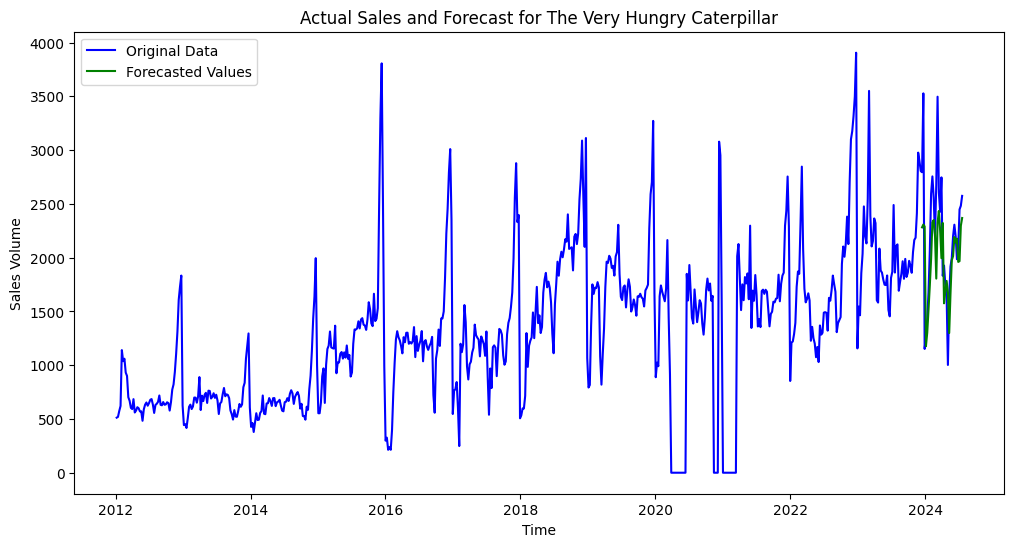

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
     

In [ ]:

xgboost_prediction(df_caterpillar, 'The Very Hungry Caterpillar')


Training and forecasting for The Alchemist


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 2 | MAE: 81.64 | MAPE: 16.01%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 3 | MAE: 89.92 | MAPE: 17.73%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 4 | MAE: 86.74 | MAPE: 17.68%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 6 | MAE: 92.86 | MAPE: 19.21%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 12 | MAE: 115.11 | MAPE: 24.20%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 24 | MAE: 120.75 | MAPE: 22.17%

Expected vs Predicted values for The Alchemist:
    Expected    Predicted
0       1050  1122.292358
1        806   702.167603
2        748   704.168640
3        695   694.635803
4        724   668.883667
5        664   723.645752
6        682   641.379517
7        618   655.512695
8        509   637.210693
9        569   518.694153
10       440   565.600586
11       366   478.716644
12       406   409.908386
13       410   407.656158
14       375   410.152588
15       314   409.613098
16       347   358.613922
17       498   350.920502
18       616   480.779297
19       404   596.869873
20       389   447.251587
21       345   408.569916
22       618   362.735748
23       531   623.277527
24       669   519.548645
25       590   638.320679
26       627   576.561829
27       672   635.178528
28       510   639.758667
29       408   519.182739

Best Window Length: 2 | Best MAE: 81.64 | Best MAPE: 16.01%


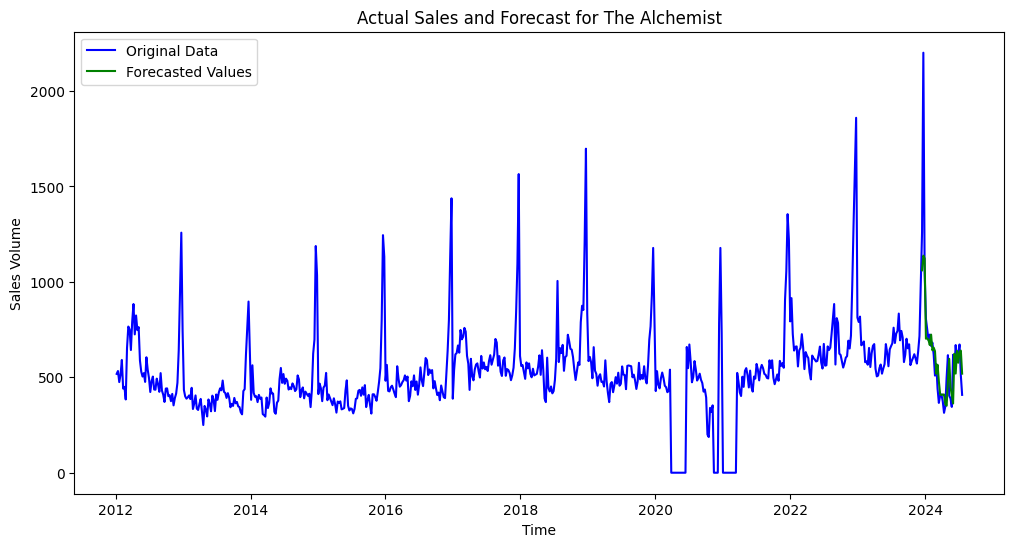

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
     

In [ ]:

xgboost_prediction(df_alchemist, 'The Alchemist')


# **LSTM**

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Foun

In [ ]:
pip install keras-tuner

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade --force-reinstall numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.1 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.5 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.1 which is incompatible.
yfinance 0.2.59 requires protobuf<6,>=5.29.0, but you have protobuf 4.25.7 which is incompatible.


In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.26.0
import os
os.kill(os.getpid(), 9)  # Reinicia el entorno automáticamente


Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Successfully uninstalled numpy-1.24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.1 which is incompatible.
yfinance 0.2.59 requires protobuf<6,>=5.29.0, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but 

In [ ]:
import numpy as np
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.26.0
TensorFlow version: 2.15.1


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import RMSprop, Adam
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## reload them
df_alchemist = pd.read_csv("/content/drive/MyDrive/topic/df_alchemist.csv", index_col=0)
df_caterpillar = pd.read_csv("/content/drive/MyDrive/topic/df_caterpillar.csv", index_col=0)


In [ ]:
df_alchemist.head()


ISBN           Title  Volume
End Date                                         
2012-01-07  9780722532935  Alchemist, The     518
2012-01-14  9780722532935  Alchemist, The     533
2012-01-21  9780722532935  Alchemist, The     475
2012-01-28  9780722532935  Alchemist, The     514
2012-02-04  9780722532935  Alchemist, The     591

In [ ]:
df_caterpillar.head()

ISBN                         Title  Volume
End Date                                                       
2012-01-07  9780241003008  Very Hungry Caterpillar, The     512
2012-01-14  9780241003008  Very Hungry Caterpillar, The     519
2012-01-21  9780241003008  Very Hungry Caterpillar, The     574
2012-01-28  9780241003008  Very Hungry Caterpillar, The     621
2012-02-04  9780241003008  Very Hungry Caterpillar, The    1140

Prepare data for lstm

In [ ]:
previous_steps = 52  # Number of previous timesteps to use
features = 1  # Number of features
forecast_horizon = 32


In [ ]:
def prepare_lstm_data(sales_train, previous_steps, features):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(sales_train.values.reshape(-1, 1))
    generator = TimeseriesGenerator(scaled_data, scaled_data, length=previous_steps, batch_size=32)
    return generator, scaler


Build model with hp tuning

In [ ]:
def build_lstm(hp):
    model = Sequential()
    num_layers = hp.Int('num_lstm_layers', 1, 3)

    for i in range(num_layers):
        lstm_units = hp.Int(f'units_lstm_{i}', min_value=4, max_value=128, step=32)
        dropout_rate = hp.Float(f'dropout_lstm_{i}', min_value=0.1, max_value=0.5, step=0.1)

        if i == 0:
            model.add(LSTM(
                units=lstm_units,
                activation='relu',
                return_sequences=(num_layers > 1),
                input_shape=(previous_steps, features)
            ))
        else:
            model.add(LSTM(
                units=lstm_units,
                activation='relu',
                return_sequences=(i < num_layers - 1)
            ))

        model.add(Dropout(dropout_rate))

    model.add(Dense(1))

    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mse')
    return model



tune model with randomsearch

In [ ]:
def tune_lstm_model(generator):
    tuner = RandomSearch(
        build_lstm,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='lstm_tuner',
        project_name='lstm_sales_extended',
        overwrite=True
    )
    tuner.search(generator, epochs=100, validation_data=generator, verbose=1)
    best_model = tuner.get_best_models(num_models=1)[0]
    best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

    print(f"Best trial: {best_trial.trial_id}")
    for param, value in best_trial.hyperparameters.values.items():
        print(f"{param}: {value}")

    return best_model


In [ ]:
def forecast_lstm(model, df, scaler, previous_steps, features, forecast_horizon):
    forecast = []
    input_seq = scaler.transform(df.values[-previous_steps:].reshape(-1, features))

    for _ in range(forecast_horizon):
        input_seq = input_seq.reshape((1, previous_steps, features))
        prediction = model.predict(input_seq, verbose=0)
        forecast.append(prediction[0, 0])
        input_seq = np.append(input_seq[:, 1:, :], prediction.reshape((1, 1, features)), axis=1)

    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


In [ ]:
def lstm_prediction(df, book_title):
    print(f"\nTraining and forecasting for {book_title}")

    # Ensure that sales data is properly indexed by datetime
    sales = df['Volume']
    sales.index = pd.to_datetime(sales.index, errors='coerce')  # Convert to DatetimeIndex
    sales_train = sales[:-forecast_horizon]
    sales_test = sales[-forecast_horizon:]

    # Prepare data for LSTM
    generator, scaler = prepare_lstm_data(sales_train, previous_steps, features)

    # Tune and get the best model
    best_model = tune_lstm_model(generator)

    # Fit the model
    history = best_model.fit(generator, epochs=100, validation_data=generator,
                             callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

    # Generate forecast
    forecast = forecast_lstm(best_model, sales, scaler, previous_steps, features, forecast_horizon)

    # Calculate MAE and MAPE
    mae = mean_absolute_error(sales_test, forecast)
    mape = mean_absolute_percentage_error(sales_test, forecast) * 100

    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Actual Sales', color='blue')

    # Ensure future_index is a DatetimeIndex
    future_index = pd.date_range(start=sales.index[-1], periods=forecast_horizon + 1, freq='W-SAT')[1:]

    # Ensure that future_index is a proper DatetimeIndex
    future_index = pd.to_datetime(future_index)

    # Plot the forecasted sales
    plt.plot(future_index, forecast, label='Forecasted Sales', color='green')

    plt.title(f"Sales Forecast for {book_title}")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.legend()
    plt.show()

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({'Actual Sales': sales_test.values, 'Forecasted Sales': forecast.flatten()})

    return comparison_df, best_model


# LSTM prediction

Trial 10 Complete [00h 02m 07s]
val_loss: 0.25740739703178406

Best val_loss So Far: 0.16308195888996124
Total elapsed time: 00h 30m 14s
Best trial: 05
num_lstm_layers: 3
units_lstm_0: 100
dropout_lstm_0: 0.2
optimizer: rmsprop
learning_rate: 0.002453300557628428
units_lstm_1: 68
dropout_lstm_1: 0.1
units_lstm_2: 100
dropout_lstm_2: 0.5
Epoch 1/100
18/18 [==============================] - 8s 179ms/step - loss: 0.2036 - val_loss: 0.1766
Epoch 2/100
18/18 [==============================] - 3s 146ms/step - loss: 0.2260 - val_loss: 0.1780
Epoch 3/100
18/18 [==============================] - 3s 147ms/step - loss: 0.2365 - val_loss: 0.1535
Epoch 4/100
18/18 [==============================] - 4s 237ms/step - loss: 0.2333 - val_loss: 0.1579
Epoch 5/100
18/18 [==============================] - 3s 150ms/step - loss: 0.2340 - val_loss: 0.1634
Epoch 6/100
18/18 [==============================] - 3s 144ms/step - loss: 0.2264 - val_loss: 0.1665
Epoch 7/100
18/18 [==============================] - 3s

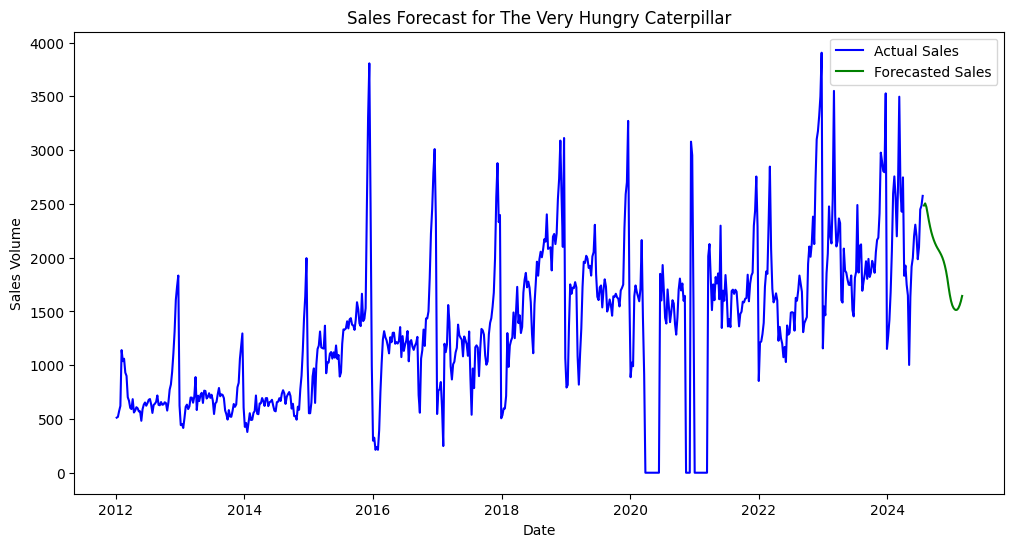

(    Actual Sales  Forecasted Sales
 0           2794       2484.428711
 1           3527       2503.960449
 2           1151       2471.020996
 3           1273       2408.794678
 4           1421       2344.292480
 5           1679       2287.198242
 6           2062       2238.059082
 7           2595       2198.056641
 8           2755       2163.653076
 9           2558       2134.512939
 10          2198       2109.453125
 11          2675       2087.754639
 12          3496       2068.580811
 13          2605       2048.402100
 14          2427       2025.952393
 15          2746       1999.586182
 16          1831       1966.608154
 17          1926       1924.400269
 18          1748       1872.531128
 19          1648       1806.436768
 20          1002       1727.179688
 21          1635       1654.807129
 22          1917       1597.373047
 23          1997       1557.122559
 24          2200       1532.219727
 25          2306       1518.006714
 26          2197       1512

In [ ]:
# The very hungry caterpillar
lstm_prediction(df_caterpillar, 'The Very Hungry Caterpillar')


Training and forecasting for The Alchemist
Reloading Tuner from lstm_tuner/lstm_sales_extended/tuner0.json
Best trial: 03
num_lstm_layers: 2
units_lstm_0: 36
dropout_lstm_0: 0.30000000000000004
optimizer: adam
learning_rate: 0.002056724845809137
units_lstm_1: 68
dropout_lstm_1: 0.1
Epoch 1/100
18/18 [==============================] - 4s 86ms/step - loss: 0.1594 - val_loss: 0.1260
Epoch 2/100
18/18 [==============================] - 1s 65ms/step - loss: 0.1538 - val_loss: 0.1158
Epoch 3/100
18/18 [==============================] - 1s 62ms/step - loss: 0.1564 - val_loss: 0.1142
Epoch 4/100
18/18 [==============================] - 1s 63ms/step - loss: 0.1392 - val_loss: 0.1205
Epoch 5/100
18/18 [==============================] - 2s 98ms/step - loss: 0.1506 - val_loss: 0.1254
Epoch 6/100
18/18 [==============================] - 2s 115ms/step - loss: 0.1948 - val_loss: 0.1432
Epoch 7/100
18/18 [==============================] - 1s 62ms/step - loss: 0.1646 - val_loss: 0.1282
Epoch 8/100
18/

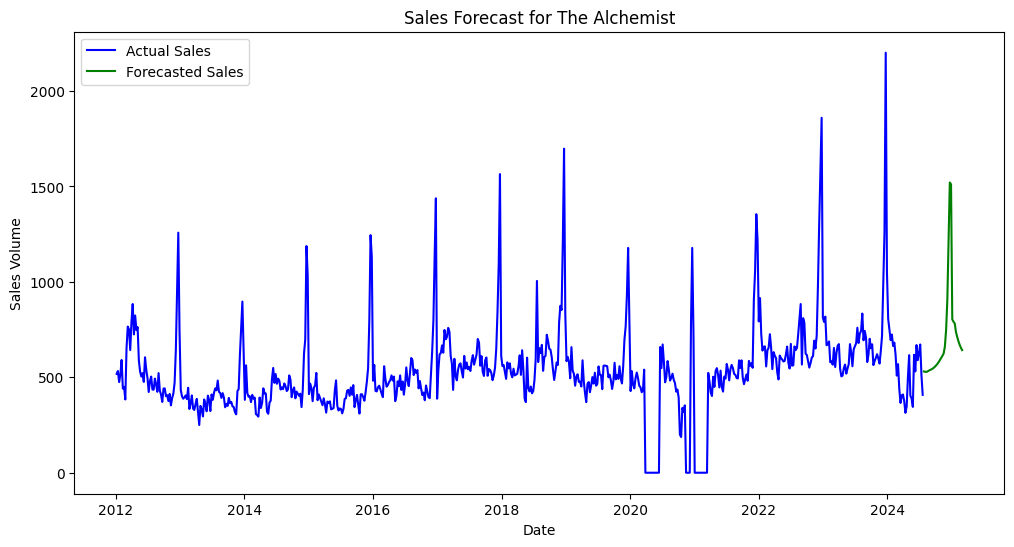

(    Actual Sales  Forecasted Sales
 0           1260        530.599915
 1           2201        529.036438
 2           1050        528.355713
 3            806        531.187439
 4            748        534.856445
 5            695        538.773438
 6            724        541.289612
 7            664        545.258972
 8            682        550.254333
 9            618        556.285767
 10           509        563.030884
 11           569        570.937805
 12           440        580.302246
 13           366        590.500916
 14           406        601.459045
 15           410        612.698730
 16           375        624.730347
 17           314        661.094360
 18           347        748.684998
 19           498        908.056396
 20           616       1216.328125
 21           404       1521.128418
 22           389       1511.507568
 23           345        803.586182
 24           618        791.239380
 25           531        782.426331
 26           669        737

In [ ]:
# The Alchemist
lstm_prediction(df_alchemist, 'The Alchemist')

# Hybrid Models

"Apply a hybrid model of SARIMA and LSTM in sequential combination wherein the residuals from SARIMA will be forecasted using LSTM.
The final prediction will be the sum of the predictions from SARIMA and LSTM.

The LSTM will be trained on the residuals obtained during the training of the SARIMA model.

The forecast horizon will be the final 32 weeks.

Use KerasTuner to get the best model.

Plot the results. Display the MAE and MAPE, and comment on the results."

# Sarima and LSTM in a sequential combination

In [ ]:
def hybrid_forecast_caterpillar(df):
    print("\nTraining and forecasting for Caterpillar")

    sales = df['Volume']
    sales_train = sales[:-forecast_horizon]
    sales_test = sales[-forecast_horizon:]

    # Best SARIMA for Caterpillar: (1,0,0)(2,0,1)[52]
    sarima_model = sm.tsa.statespace.SARIMAX(sales_train, order=(1, 0, 0), seasonal_order=(2, 0, 1, 52))
    sarima_fit = sarima_model.fit(disp=False)

    sarima_pred = sarima_fit.predict(start=len(sales_train), end=len(sales_train) + forecast_horizon - 1)
    residuals = sales_train - sarima_fit.fittedvalues

    generator, scaler = prepare_lstm_data(residuals, previous_steps, features)
    best_lstm_model = tune_lstm_model(generator)
    best_lstm_model.fit(generator, epochs=100, validation_data=generator)

    lstm_forecast_residuals = forecast_lstm(best_lstm_model, residuals, scaler, previous_steps, features, forecast_horizon)
    final_forecast = sarima_pred.values + lstm_forecast_residuals.flatten()

    mae = mean_absolute_error(sales_test, final_forecast)
    mape = mean_absolute_percentage_error(sales_test, final_forecast) * 100

    print(f"\nMean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Actual Sales', color='blue')
    future_index = pd.date_range(start=sales.index[-1], periods=forecast_horizon + 1, freq='W-SAT')[1:]
    plt.plot(future_index, final_forecast, label='Hybrid Forecast', color='green')
    plt.title("Sales Forecast for Caterpillar using Hybrid SARIMA-LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.legend()
    plt.show()

    comparison_df = pd.DataFrame({'Actual Sales': sales_test.values, 'Forecasted Sales': final_forecast})
    print(comparison_df)


Trial 10 Complete [00h 01m 10s]
val_loss: 0.9580695033073425

Best val_loss So Far: 0.9351258277893066
Total elapsed time: 00h 26m 20s
Best trial: 00
num_lstm_layers: 2
units_lstm_0: 68
dropout_lstm_0: 0.30000000000000004
optimizer: rmsprop
learning_rate: 0.0005275332628165129
units_lstm_1: 4
dropout_lstm_1: 0.1
Epoch 1/100
18/18 [==============================] - 4s 84ms/step - loss: 0.9952 - val_loss: 0.9490
Epoch 2/100
18/18 [==============================] - 1s 60ms/step - loss: 0.9393 - val_loss: 0.9364
Epoch 3/100
18/18 [==============================] - 1s 62ms/step - loss: 147.4105 - val_loss: 0.9402
Epoch 4/100
18/18 [==============================] - 1s 64ms/step - loss: 0.9808 - val_loss: 0.9394
Epoch 5/100
18/18 [==============================] - 1s 60ms/step - loss: 0.9445 - val_loss: 0.9386
Epoch 6/100
18/18 [==============================] - 1s 75ms/step - loss: 0.9597 - val_loss: 0.9376
Epoch 7/100
18/18 [==============================] - 2s 113ms/step - loss: 0.9899 - 

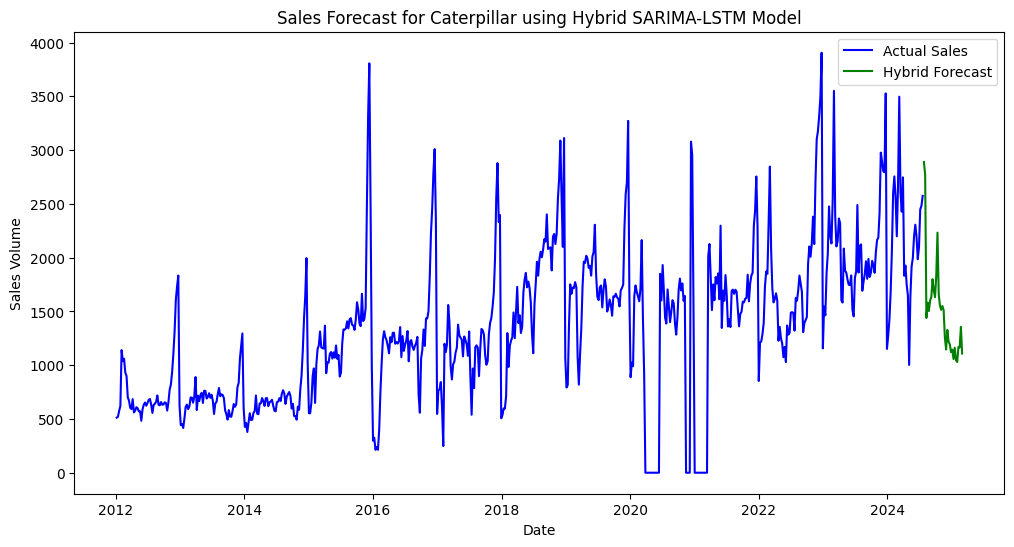

    Actual Sales  Forecasted Sales
0           2794       2889.040145
1           3527       2770.666510
2           1151       1438.789254
3           1273       1581.473556
4           1421       1503.317277
5           1679       1600.738983
6           2062       1633.678573
7           2595       1799.750755
8           2755       1696.441673
9           2558       1632.290168
10          2198       1829.995707
11          2675       2231.998854
12          3496       1659.816307
13          2605       1554.758326
14          2427       1514.461231
15          2746       1550.252718
16          1831       1510.940764
17          1926       1255.877770
18          1748       1145.847453
19          1648       1327.493458
20          1002       1220.315341
21          1635       1193.192401
22          1917       1120.412891
23          1997       1145.069358
24          2200       1057.451514
25          2306       1162.523106
26          2197       1045.970860
27          1985    

In [ ]:
hybrid_forecast_caterpillar(df_caterpillar)

In [ ]:
def hybrid_forecast_alchemist(df):
    print("\nTraining and forecasting for The Alchemist")

    sales = df['Volume']
    sales_train = sales[:-forecast_horizon]
    sales_test = sales[-forecast_horizon:]

    # Best SARIMA for Alchemist: (1,0,1)(1,0,0)[52]
    sarima_model = sm.tsa.statespace.SARIMAX(sales_train, order=(1, 0, 1), seasonal_order=(1, 0, 0, 52))
    sarima_fit = sarima_model.fit(disp=False)

    sarima_pred = sarima_fit.predict(start=len(sales_train), end=len(sales_train) + forecast_horizon - 1)
    residuals = sales_train - sarima_fit.fittedvalues

    generator, scaler = prepare_lstm_data(residuals, previous_steps, features)
    best_lstm_model = tune_lstm_model(generator)
    best_lstm_model.fit(generator, epochs=100, validation_data=generator)

    lstm_forecast_residuals = forecast_lstm(best_lstm_model, residuals, scaler, previous_steps, features, forecast_horizon)
    final_forecast = sarima_pred.values + lstm_forecast_residuals.flatten()

    mae = mean_absolute_error(sales_test, final_forecast)
    mape = mean_absolute_percentage_error(sales_test, final_forecast) * 100

    print(f"\nMean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Actual Sales', color='blue')
    future_index = pd.date_range(start=sales.index[-1], periods=forecast_horizon + 1, freq='W-SAT')[1:]
    plt.plot(future_index, final_forecast, label='Hybrid Forecast', color='green')
    plt.title("Sales Forecast for The Alchemist using Hybrid SARIMA-LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.legend()
    plt.show()

    comparison_df = pd.DataFrame({'Actual Sales': sales_test.values, 'Forecasted Sales': final_forecast})
    print(comparison_df)



Trial 10 Complete [00h 01m 01s]
val_loss: 0.8910959362983704

Best val_loss So Far: 0.6814491152763367
Total elapsed time: 00h 23m 13s
Best trial: 08
num_lstm_layers: 1
units_lstm_0: 100
dropout_lstm_0: 0.2
optimizer: rmsprop
learning_rate: 0.005700828609973588
units_lstm_1: 4
dropout_lstm_1: 0.5
units_lstm_2: 100
dropout_lstm_2: 0.2
Epoch 1/100
18/18 [==============================] - 2s 66ms/step - loss: 0.7372 - val_loss: 0.6991
Epoch 2/100
18/18 [==============================] - 1s 50ms/step - loss: 0.7161 - val_loss: 0.6848
Epoch 3/100
18/18 [==============================] - 1s 50ms/step - loss: 0.7229 - val_loss: 0.7231
Epoch 4/100
18/18 [==============================] - 1s 50ms/step - loss: 0.7146 - val_loss: 0.6950
Epoch 5/100
18/18 [==============================] - 1s 68ms/step - loss: 0.7309 - val_loss: 0.7076
Epoch 6/100
18/18 [==============================] - 1s 73ms/step - loss: 0.7505 - val_loss: 0.6785
Epoch 7/100
18/18 [==============================] - 2s 90ms/ste

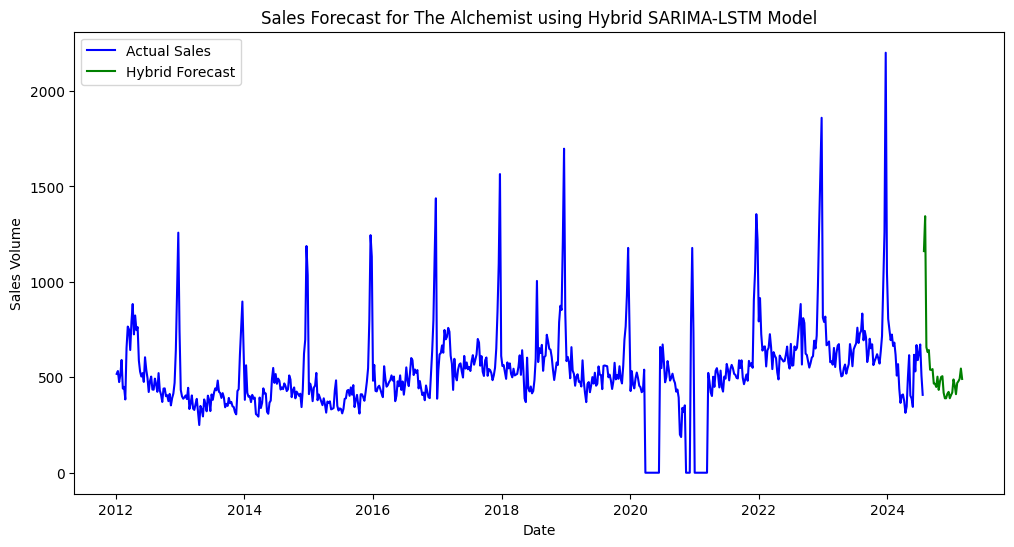

    Actual Sales  Forecasted Sales
0           1260       1161.497912
1           2201       1344.386168
2           1050        657.676871
3            806        631.999313
4            748        642.893834
5            695        539.926444
6            724        538.758219
7            664        543.103660
8            682        467.152808
9            618        465.725135
10           509        449.440922
11           569        503.411497
12           440        434.245862
13           366        478.565977
14           406        502.241496
15           410        505.833553
16           375        418.879647
17           314        390.058460
18           347        390.149415
19           498        413.360539
20           616        423.675092
21           404        390.388019
22           389        406.664678
23           345        420.585336
24           618        488.824358
25           531        457.882021
26           669        411.645490
27           590    

In [ ]:
hybrid_forecast_alchemist(df_alchemist)

# Sarima and LSTM in parallel combination

In [ ]:
def parallel_hybrid_forecast_caterpillar(df, sarima_weight=0.5, lstm_weight=0.5):
    print("\nTraining and forecasting for Caterpillar")

    sales = df['Volume']
    sales_train = sales[:-forecast_horizon]
    sales_test = sales[-forecast_horizon:]

    # SARIMA: (1,0,0)(2,0,1)[52]
    sarima_model = sm.tsa.statespace.SARIMAX(sales_train, order=(1, 0, 0), seasonal_order=(2, 0, 1, 52))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_prediction = sarima_fit.predict(start=len(sales_train), end=len(sales_train) + forecast_horizon - 1)

    # LSTM
    generator, scaler = prepare_lstm_data(sales_train, previous_steps, features)
    best_lstm_model = tune_lstm_model(generator)
    best_lstm_model.fit(generator, epochs=50, validation_data=generator)
    lstm_forecast = forecast_lstm(best_lstm_model, sales_train, scaler, previous_steps, features, forecast_horizon)

    # Combine forecasts
    final_forecast = sarima_weight * sarima_prediction.values + lstm_weight * lstm_forecast.flatten()

    mae = mean_absolute_error(sales_test, final_forecast)
    mape = mean_absolute_percentage_error(sales_test, final_forecast) * 100

    print(f"\nMean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Actual Sales', color='blue')
    future_index = pd.date_range(start=sales.index[-1], periods=forecast_horizon + 1, freq='W-SAT')[1:]
    plt.plot(future_index, final_forecast, label='Hybrid Forecast (SARIMA + LSTM)', color='green')
    plt.title("Sales Forecast for Caterpillar using Parallel Hybrid SARIMA-LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.legend()
    plt.show()

    comparison_df = pd.DataFrame({'Actual Sales': sales_test.values, 'Forecasted Sales': final_forecast})
    print(comparison_df)


Trial 10 Complete [00h 02m 19s]
val_loss: 0.36112987995147705

Best val_loss So Far: 0.18012897670269012
Total elapsed time: 00h 18m 04s
Best trial: 02
num_lstm_layers: 3
units_lstm_0: 36
dropout_lstm_0: 0.1
optimizer: rmsprop
learning_rate: 0.0027494740914787118
units_lstm_1: 68
dropout_lstm_1: 0.5
units_lstm_2: 68
dropout_lstm_2: 0.1
Epoch 1/50
18/18 [==============================] - 4s 85ms/step - loss: 0.2104 - val_loss: 0.1873
Epoch 2/50
18/18 [==============================] - 1s 62ms/step - loss: 0.2227 - val_loss: 0.1822
Epoch 3/50
18/18 [==============================] - 1s 64ms/step - loss: 0.2058 - val_loss: 0.1913
Epoch 4/50
18/18 [==============================] - 1s 61ms/step - loss: 0.2259 - val_loss: 0.1729
Epoch 5/50
18/18 [==============================] - 2s 98ms/step - loss: 0.1996 - val_loss: 0.1785
Epoch 6/50
18/18 [==============================] - 1s 64ms/step - loss: 0.2080 - val_loss: 0.1671
Epoch 7/50
18/18 [==============================] - 1s 61ms/step - l

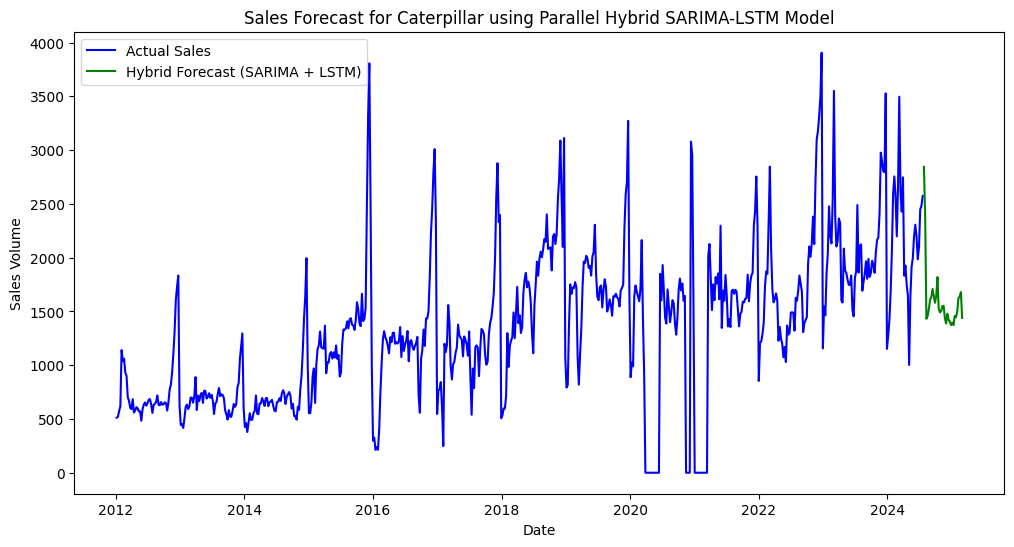

    Actual Sales  Forecasted Sales
0           2794       2843.988849
1           3527       2391.548692
2           1151       1431.019732
3           1273       1456.886701
4           1421       1520.962365
5           1679       1608.971964
6           2062       1631.308859
7           2595       1708.984134
8           2755       1642.004175
9           2558       1580.015882
10          2198       1646.460761
11          2675       1819.120094
12          3496       1523.936085
13          2605       1491.134929
14          2427       1503.903553
15          2746       1550.579240
16          1831       1551.156766
17          1926       1437.234188
18          1748       1387.590006
19          1648       1477.995359
20          1002       1421.327421
21          1635       1405.708530
22          1917       1372.626779
23          1997       1395.637636
24          2200       1372.155685
25          2306       1456.913994
26          2197       1445.754793
27          1985    

In [ ]:
parallel_hybrid_forecast_caterpillar(df_caterpillar)

Trial 10 Complete [00h 02m 13s]
val_loss: 1.011208415031433

Best val_loss So Far: 0.1523696482181549
Total elapsed time: 00h 13m 12s
Best trial: 08
num_lstm_layers: 1
units_lstm_0: 100
dropout_lstm_0: 0.1
optimizer: rmsprop
learning_rate: 0.0020853562398959924
units_lstm_1: 68
dropout_lstm_1: 0.1
units_lstm_2: 100
dropout_lstm_2: 0.4
Epoch 1/50
18/18 [==============================] - 2s 47ms/step - loss: 0.1689 - val_loss: 0.1710
Epoch 2/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1878 - val_loss: 0.1657
Epoch 3/50
18/18 [==============================] - 1s 36ms/step - loss: 0.1790 - val_loss: 0.1604
Epoch 4/50
18/18 [==============================] - 1s 39ms/step - loss: 0.1744 - val_loss: 0.1698
Epoch 5/50
18/18 [==============================] - 1s 28ms/step - loss: 0.1859 - val_loss: 0.1654
Epoch 6/50
18/18 [==============================] - 0s 27ms/step - loss: 0.1813 - val_loss: 0.1505
Epoch 7/50
18/18 [==============================] - 1s 29ms/step - lo

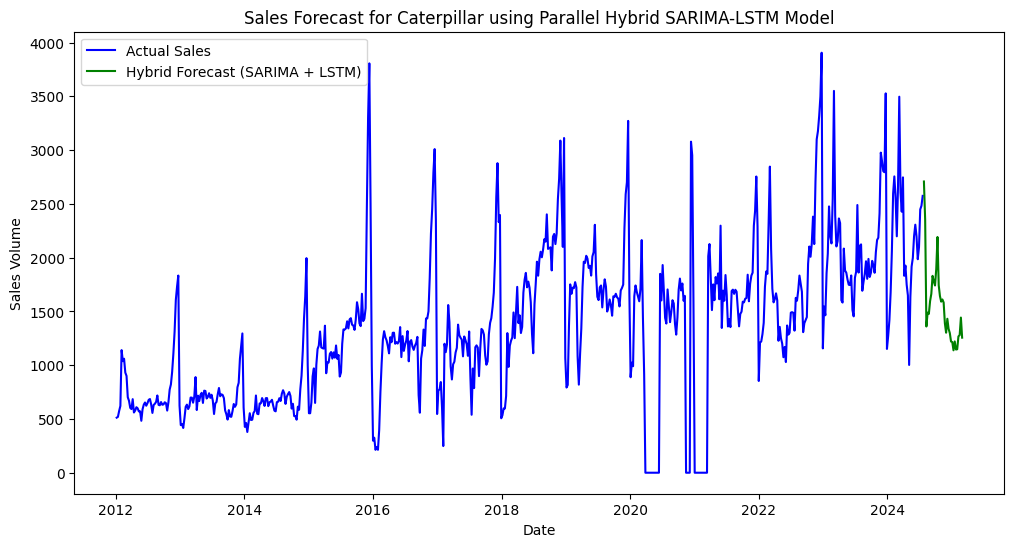

    Actual Sales  Forecasted Sales
0           2794       2707.646421
1           3527       2352.054666
2           1151       1359.588161
3           1273       1488.661625
4           1421       1476.943181
5           1679       1596.042510
6           2062       1663.303376
7           2595       1830.362890
8           2755       1779.902442
9           2558       1740.564686
10          2198       1893.895671
11          2675       2191.827754
12          3496       1743.456434
13          2605       1642.159394
14          2427       1590.694532
15          2746       1610.754449
16          1831       1582.576061
17          1926       1389.090144
18          1748       1301.882811
19          1648       1431.429227
20          1002       1338.193493
21          1635       1298.578756
22          1917       1220.044631
23          1997       1214.896273
24          2200       1138.172858
25          2306       1220.697407
26          2197       1145.474963
27          1985    

In [ ]:
parallel_hybrid_forecast_caterpillar(df_caterpillar, sarima_weight=0.75, lstm_weight=0.25)

Trial 10 Complete [00h 00m 32s]
val_loss: 0.39801836013793945

Best val_loss So Far: 0.12561729550361633
Total elapsed time: 00h 09m 35s
Best trial: 02
num_lstm_layers: 1
units_lstm_0: 36
dropout_lstm_0: 0.2
optimizer: adam
learning_rate: 0.0021233198096917887
units_lstm_1: 100
dropout_lstm_1: 0.30000000000000004
units_lstm_2: 4
dropout_lstm_2: 0.1
Epoch 1/50
18/18 [==============================] - 1s 29ms/step - loss: 0.1850 - val_loss: 0.1733
Epoch 2/50
18/18 [==============================] - 0s 17ms/step - loss: 0.2038 - val_loss: 0.1657
Epoch 3/50
18/18 [==============================] - 0s 17ms/step - loss: 0.2065 - val_loss: 0.1687
Epoch 4/50
18/18 [==============================] - 0s 18ms/step - loss: 0.1881 - val_loss: 0.1484
Epoch 5/50
18/18 [==============================] - 0s 17ms/step - loss: 0.1884 - val_loss: 0.1424
Epoch 6/50
18/18 [==============================] - 0s 18ms/step - loss: 0.1643 - val_loss: 0.1283
Epoch 7/50
18/18 [==============================] - 0s 

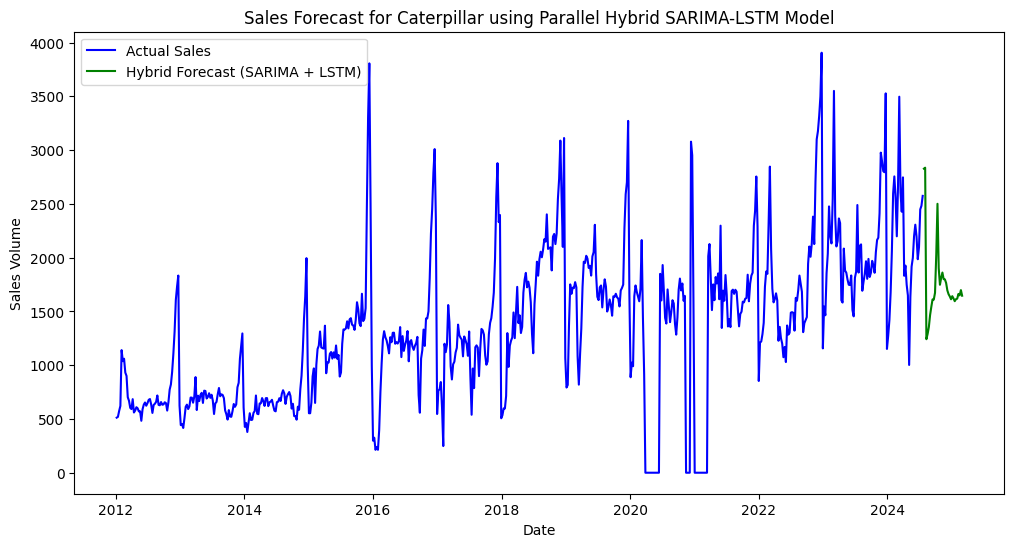

    Actual Sales  Forecasted Sales
0           2794       2827.166788
1           3527       2835.952569
2           1151       1241.445840
3           1273       1290.175010
4           1421       1354.864086
5           1679       1465.774129
6           2062       1542.513377
7           2595       1611.432100
8           2755       1609.535840
9           2558       1672.719397
10          2198       2025.280979
11          2675       2500.276996
12          3496       1902.620020
13          2605       1747.579580
14          2427       1812.429712
15          2746       1861.221352
16          1831       1799.682051
17          1926       1797.559172
18          1748       1764.965291
19          1648       1695.563567
20          1002       1659.778792
21          1635       1639.098711
22          1917       1612.751531
23          1997       1641.509705
24          2200       1620.510917
25          2306       1594.959103
26          2197       1613.305924
27          1985    

In [ ]:
parallel_hybrid_forecast_caterpillar(df_caterpillar, sarima_weight=0.25, lstm_weight=0.75)

In [ ]:
def parallel_hybrid_forecast_alchemist(df, sarima_weight=0.5, lstm_weight=0.5):
    print("\nTraining and forecasting for The Alchemist")

    sales = df['Volume']
    sales_train = sales[:-forecast_horizon]
    sales_test = sales[-forecast_horizon:]

    # SARIMA: (1,0,1)(1,0,0)[52]
    sarima_model = sm.tsa.statespace.SARIMAX(sales_train, order=(1, 0, 1), seasonal_order=(1, 0, 0, 52))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_pred = sarima_fit.predict(start=len(sales_train), end=len(sales_train) + forecast_horizon - 1)

    # LSTM
    generator, scaler = prepare_lstm_data(sales_train, previous_steps, features)
    best_lstm_model = tune_lstm_model(generator)
    best_lstm_model.fit(generator, epochs=50, validation_data=generator)
    lstm_forecast = forecast_lstm(best_lstm_model, sales_train, scaler, previous_steps, features, forecast_horizon)

    # Combine forecasts
    final_forecast = sarima_weight * sarima_pred.values + lstm_weight * lstm_forecast.flatten()

    mae = mean_absolute_error(sales_test, final_forecast)
    mape = mean_absolute_percentage_error(sales_test, final_forecast) * 100

    print(f"\nMean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Actual Sales', color='blue')
    future_index = pd.date_range(start=sales.index[-1], periods=forecast_horizon + 1, freq='W-SAT')[1:]
    plt.plot(future_index, final_forecast, label='Hybrid Forecast (SARIMA + LSTM)', color='green')
    plt.title("Sales Forecast for The Alchemist using Parallel Hybrid SARIMA-LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.legend()
    plt.show()

    comparison_df = pd.DataFrame({'Actual Sales': sales_test.values, 'Forecasted Sales': final_forecast})
    print(comparison_df)


Trial 10 Complete [00h 05m 36s]
val_loss: 0.6148397922515869

Best val_loss So Far: 0.1751786768436432
Total elapsed time: 00h 34m 01s
Best trial: 05
num_lstm_layers: 3
units_lstm_0: 68
dropout_lstm_0: 0.4
optimizer: rmsprop
learning_rate: 0.004390424644865123
units_lstm_1: 100
dropout_lstm_1: 0.1
units_lstm_2: 4
dropout_lstm_2: 0.2
Epoch 1/50
18/18 [==============================] - 7s 162ms/step - loss: 0.3623 - val_loss: 0.2652
Epoch 2/50
18/18 [==============================] - 2s 135ms/step - loss: 0.3640 - val_loss: 0.2393
Epoch 3/50
18/18 [==============================] - 4s 226ms/step - loss: 0.3978 - val_loss: 0.1556
Epoch 4/50
18/18 [==============================] - 2s 115ms/step - loss: 0.2950 - val_loss: 0.2877
Epoch 5/50
18/18 [==============================] - 2s 120ms/step - loss: 0.3487 - val_loss: 0.1524
Epoch 6/50
18/18 [==============================] - 2s 114ms/step - loss: 0.3436 - val_loss: 0.2602
Epoch 7/50
18/18 [==============================] - 2s 113ms/step

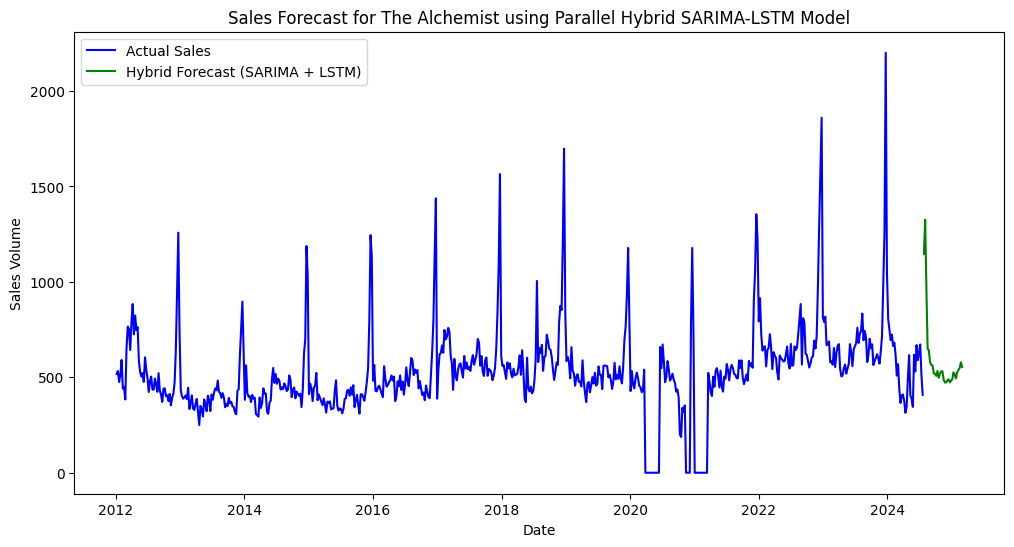

    Actual Sales  Forecasted Sales
0           1260       1147.543911
1           2201       1325.722691
2           1050        970.841361
3            806        649.363003
4            748        641.292903
5            695        578.007870
6            724        564.296370
7            664        562.055795
8            682        520.352622
9            618        517.443298
10           509        507.818427
11           569        533.666578
12           440        498.326047
13           366        519.778022
14           406        530.819528
15           410        532.222812
16           375        487.966760
17           314        473.062074
18           347        472.881665
19           498        484.433903
20           616        489.678092
21           404        473.261324
22           389        481.963434
23           345        489.974716
24           618        525.841557
25           531        513.789295
26           669        494.140836
27           590    

In [ ]:
parallel_hybrid_forecast_alchemist(df_alchemist)

Trial 10 Complete [00h 02m 21s]
val_loss: 0.8213918805122375

Best val_loss So Far: 0.1410154551267624
Total elapsed time: 00h 12m 47s
Best trial: 03
num_lstm_layers: 3
units_lstm_0: 100
dropout_lstm_0: 0.2
optimizer: rmsprop
learning_rate: 0.0019775827120950985
units_lstm_1: 36
dropout_lstm_1: 0.2
units_lstm_2: 4
dropout_lstm_2: 0.1
Epoch 1/50
18/18 [==============================] - 4s 82ms/step - loss: 0.2064 - val_loss: 0.1483
Epoch 2/50
18/18 [==============================] - 2s 98ms/step - loss: 0.2307 - val_loss: 0.1530
Epoch 3/50
18/18 [==============================] - 1s 70ms/step - loss: 0.2452 - val_loss: 0.1829
Epoch 4/50
18/18 [==============================] - 1s 58ms/step - loss: 0.3045 - val_loss: 0.1471
Epoch 5/50
18/18 [==============================] - 1s 60ms/step - loss: 0.2474 - val_loss: 0.1567
Epoch 6/50
18/18 [==============================] - 1s 60ms/step - loss: 0.2452 - val_loss: 0.1692
Epoch 7/50
18/18 [==============================] - 1s 59ms/step - los

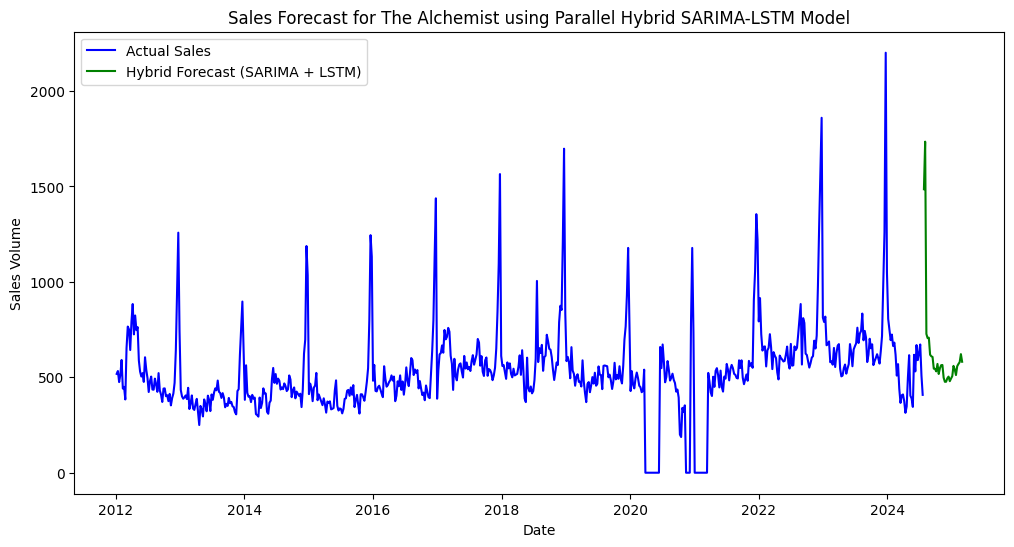

    Actual Sales  Forecasted Sales
0           1260       1485.578775
1           2201       1734.904013
2           1050        727.266238
3            806        705.185617
4            748        707.689248
5            695        618.486476
6            724        610.226140
7            664        606.580106
8            682        545.408450
9            618        543.948960
10           509        531.019526
11           569        570.084538
12           440        517.598125
13           366        548.378109
14           406        563.510572
15           410        564.469532
16           375        498.138892
17           314        476.412920
18           347        476.812168
19           498        494.972845
20           616        503.643969
21           404        479.704028
22           389        493.553183
23           345        506.127738
24           618        559.877127
25           531        541.466887
26           669        511.683606
27           590    

In [ ]:
parallel_hybrid_forecast_alchemist(df_alchemist, sarima_weight=0.75, lstm_weight=0.25)

Trial 10 Complete [00h 01m 24s]
val_loss: 0.1327090859413147

Best val_loss So Far: 0.1244005486369133
Total elapsed time: 00h 18m 03s
Best trial: 03
num_lstm_layers: 1
units_lstm_0: 36
dropout_lstm_0: 0.1
optimizer: rmsprop
learning_rate: 0.009291751144278985
units_lstm_1: 68
dropout_lstm_1: 0.30000000000000004
units_lstm_2: 100
dropout_lstm_2: 0.5
Epoch 1/50
18/18 [==============================] - 2s 28ms/step - loss: 0.1524 - val_loss: 0.1405
Epoch 2/50
18/18 [==============================] - 0s 20ms/step - loss: 0.1765 - val_loss: 0.1454
Epoch 3/50
18/18 [==============================] - 0s 19ms/step - loss: 0.1537 - val_loss: 0.1351
Epoch 4/50
18/18 [==============================] - 0s 18ms/step - loss: 0.1705 - val_loss: 0.1632
Epoch 5/50
18/18 [==============================] - 0s 19ms/step - loss: 0.1859 - val_loss: 0.1241
Epoch 6/50
18/18 [==============================] - 0s 19ms/step - loss: 0.1657 - val_loss: 0.1353
Epoch 7/50
18/18 [==============================] - 0s

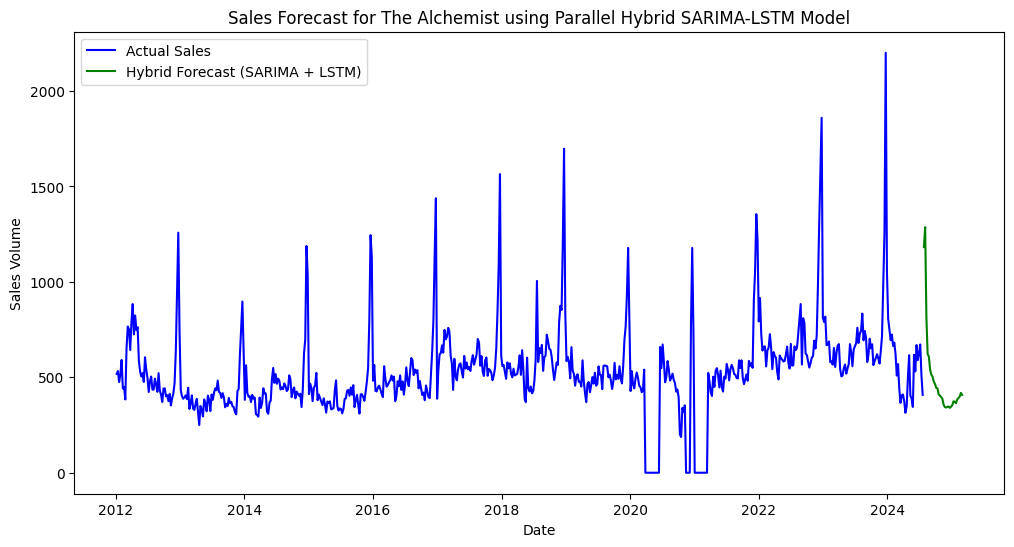

    Actual Sales  Forecasted Sales
0           1260       1182.529859
1           2201       1286.758471
2           1050        818.148311
3            806        622.233778
4            748        609.368345
5            695        540.614042
6            724        513.556159
7            664        503.810307
8            682        477.248943
9            618        465.048050
10           509        444.856083
11           569        442.140357
12           440        409.180480
13           366        404.375645
14           406        396.601338
15           410        386.995759
16           375        355.856320
17           314        343.951630
18           347        341.768225
19           498        344.562090
20           616        346.762340
21           404        339.848023
22           389        346.391202
23           345        353.331581
24           618        374.657152
25           531        371.667063
26           669        364.656234
27           590    

In [ ]:
parallel_hybrid_forecast_alchemist(df_alchemist, sarima_weight=0.25, lstm_weight=0.75)

# Monthly Prediction

Aggregate the weekly sales data to monthly sales data for both books.

In [ ]:
### Convert weekly sales into monthly sales for the alchemist and The Very Hungry Caterpillar

df_alchemist.index = pd.to_datetime(df_alchemist.index)
df_alchemist_monthly = df_alchemist.resample('M').sum()
df_caterpillar.index = pd.to_datetime(df_caterpillar.index)
df_caterpillar_monthly = df_caterpillar.resample('M').sum()


<ipython-input-7-e105d693b03a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_alchemist_monthly = df_alchemist.resample('M').sum()
<ipython-input-7-e105d693b03a>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_caterpillar_monthly = df_caterpillar.resample('M').sum()


In [ ]:
df_alchemist_monthly.head()

ISBN                                              Title  \
End Date                                                                        
2012-01-31  39122890131740  Alchemist, TheAlchemist, TheAlchemist, TheAlch...   
2012-02-29  39122890131740  Alchemist, TheAlchemist, TheAlchemist, TheAlch...   
2012-03-31  48903612664675  Alchemist, TheAlchemist, TheAlchemist, TheAlch...   
2012-04-30  39122890131740  Alchemist, TheAlchemist, TheAlchemist, TheAlch...   
2012-05-31  39122890131740  Alchemist, TheAlchemist, TheAlchemist, TheAlch...   

            Volume  
End Date            
2012-01-31    2040  
2012-02-29    1866  
2012-03-31    3604  
2012-04-30    3180  
2012-05-31    2385

In [ ]:
df_caterpillar_monthly

ISBN                                              Title  \
End Date                                                                        
2012-01-31  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2012-02-29  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2012-03-31  48901205015040  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2012-04-30  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2012-05-31  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
...                    ...                                                ...   
2024-03-31  48901205015040  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2024-04-30  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2024-05-31  39120964012032  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2024-06-30  48901205015040  Very Hungry Caterpillar, TheVery Hungry Caterp...   
2024-07-31  29340723009024  Very Hungry Caterpillar, TheVery Hungry Caterp...   

            Volume  
End Date            
2012-01-31    2226  
2012-02-29    4168  
2012-03-31    3466  
2012-04-30    2431  
2012-05-31    2223  
...            ...  
2024-03-31   13949  
2024-04-30    7153  
2024-05-31    6551  
2024-06-30   10785  
2024-07-31    7504  

[151 rows x 3 columns]

In [ ]:
def xgboost_prediction_monthly(df, book_title, window_lengths=[1, 2, 3, 4, 5, 6]):
    print(f"\nTraining and forecasting for {book_title}")

    # Extract and split the target time series
    sales = df['Volume'].dropna()
    train_data = sales[:-8]
    test_data = sales[-8:]

    best_score = float('inf')
    best_model = None
    best_window_length = None
    best_y_test = None
    best_y_pred = None

    for window_length in window_lengths:
        # Prepare lagged features for training
        df_train_lag = create_lag_features(train_data.to_frame(), window_length)
        X_train = df_train_lag.drop('Volume', axis=1)
        y_train = df_train_lag['Volume']

        # Define time-based cross-validation
        tscv = TimeSeriesSplit(n_splits=5)

        # Run grid search with time-series cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring=scoring, refit='MAE', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Prepare lagged features for testing
        df_test_lag = create_lag_features(test_data.to_frame(), window_length)
        X_test = df_test_lag.drop('Volume', axis=1)
        y_test = df_test_lag['Volume']

        # Predict and evaluate
        y_pred = grid_search.best_estimator_.predict(X_test)
        mae_score = mean_absolute_error(y_test, y_pred)
        mape_score = mape(y_test, y_pred)

        print(f"Window Length: {window_length} | MAE: {mae_score:.2f} | MAPE: {mape_score:.2f}%")

        # Track best model by MAE
        if mae_score < best_score:
            best_score = mae_score
            best_model = grid_search.best_estimator_
            best_window_length = window_length
            best_y_test = y_test
            best_y_pred = y_pred

    # Display expected vs predicted results for best model
    print(f"\nExpected vs Predicted values for {book_title}:")
    expected_vs_predicted = pd.DataFrame({
        'Expected': best_y_test.values,
        'Predicted': best_y_pred
    })
    print(expected_vs_predicted)

    # Display best model scores
    best_mape_score = mape(best_y_test, best_y_pred)
    print(f"\nBest Window Length: {best_window_length} | Best MAE: {best_score:.2f} | Best MAPE: {best_mape_score:.2f}%")

    # Retrain on full data for final forecast
    df_final_lag = create_lag_features(sales.to_frame(), best_window_length)
    X_final = df_final_lag.drop('Volume', axis=1)

    final_forecast = best_model.predict(X_final[-8:])

    # Build forecast DataFrame with future dates
    forecast_dates = pd.date_range(start=sales.index[-1] + pd.Timedelta(weeks=1), periods=8, freq='M')
    forecast_df = pd.DataFrame({
        'Forecast Date': forecast_dates,
        'Forecasted data': final_forecast
    })

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(sales.index, sales.values, label='Original Data', color='blue')

    forecast_display_index = X_final.index[-len(final_forecast):]
    plt.plot(forecast_display_index, final_forecast, label='Forecasted Values', color='green')

    plt.title(f"Actual Sales and Forecast for {book_title}")
    plt.xlabel('Time')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()

    return best_model, forecast_df


Training and forecasting for The Very Hungry Caterpillar


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 1 | MAE: 2648.67 | MAPE: 26.88%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 2 | MAE: 3093.02 | MAPE: 31.38%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 3 | MAE: 2747.66 | MAPE: 27.87%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 4 | MAE: 1080.31 | MAPE: 11.57%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 5 | MAE: 1442.41 | MAPE: 15.86%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 6 | MAE: 1999.14 | MAPE: 21.06%

Expected vs Predicted values for The Very Hungry Caterpillar:
   Expected    Predicted
0      7153  7326.797852
1      6551  6881.363281
2     10785  7814.443848
3      7504  6657.475586

Best Window Length: 4 | Best MAE: 1080.31 | Best MAPE: 11.57%


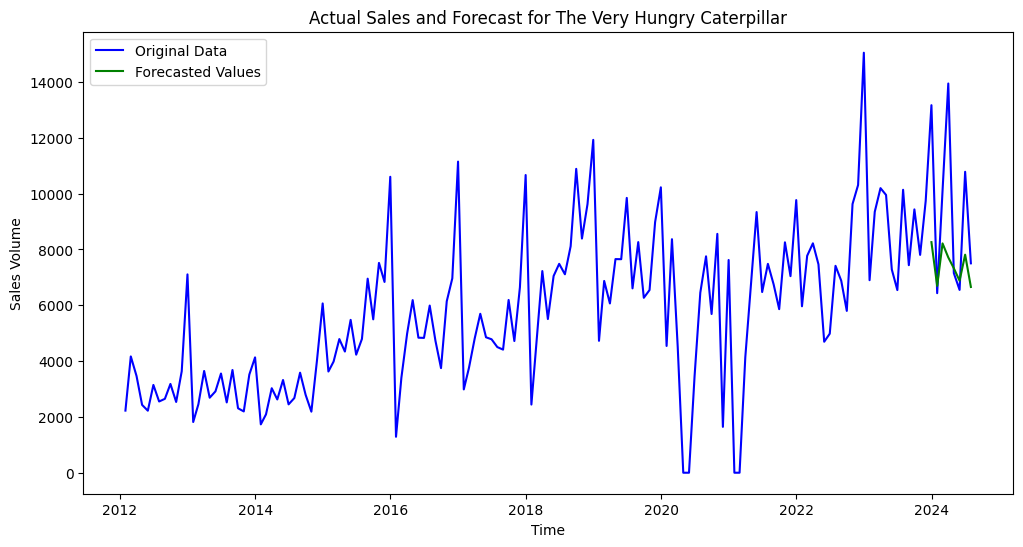

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
     

In [ ]:
xgboost_prediction_monthly(df_caterpillar_monthly, "The Very Hungry Caterpillar")


Training and forecasting for The Alchemist


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 1 | MAE: 600.07 | MAPE: 30.11%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 2 | MAE: 566.19 | MAPE: 28.90%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 3 | MAE: 558.59 | MAPE: 29.25%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 4 | MAE: 582.19 | MAPE: 33.06%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 5 | MAE: 395.06 | MAPE: 20.15%


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -

Window Length: 6 | MAE: 647.83 | MAPE: 29.50%

Expected vs Predicted values for The Alchemist:
   Expected    Predicted
0      1754  1776.996094
1      3035  2568.549561
2      1590  2285.723877

Best Window Length: 5 | Best MAE: 395.06 | Best MAPE: 20.15%


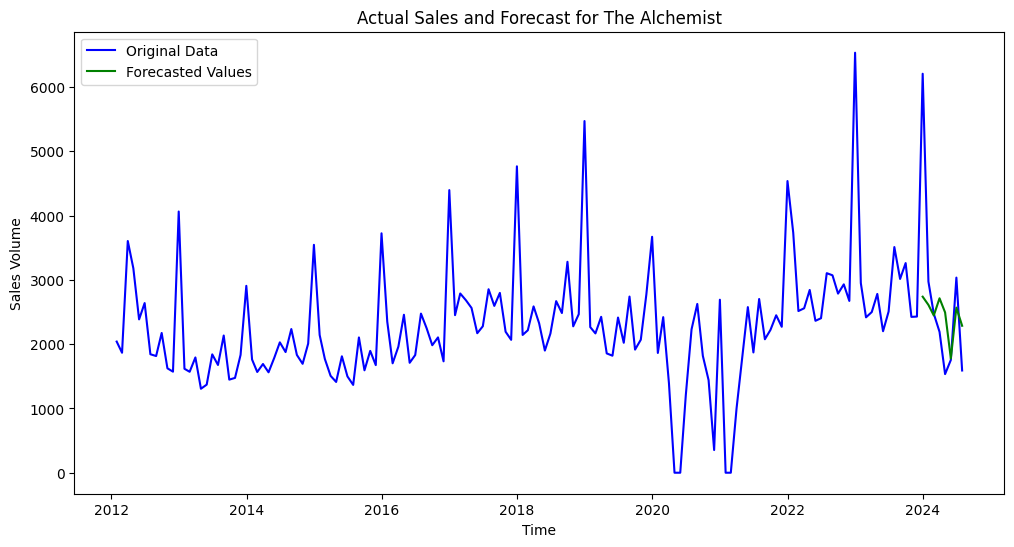

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('xgb',
                  XGBRegressor(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
     

In [ ]:
xgboost_prediction_monthly(df_alchemist_monthly, "The Alchemist")

Sarima monthly

In [ ]:
# Define forecast horizon
forecast_horizon = 8

# Training and test splits
train_caterpillar_monthly = df_caterpillar_monthly['Volume'][:-forecast_horizon]
test_caterpillar_monthly = df_caterpillar_monthly['Volume'][-forecast_horizon:]

train_alchemist_monthly = df_alchemist_monthly['Volume'][:-forecast_horizon]
test_alchemist_monthly = df_alchemist_monthly['Volume'][-forecast_horizon:]

In [ ]:
# Caterpillar
model_caterpillar_monthly = auto_arima(
    train_caterpillar_monthly,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=0,  # No non-seasonal differencing
    seasonal=True,
    m=12,  # monthly seasonality
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    D=0,  # No seasonal differencing
    stepwise=True,
    suppress_warnings=True,
    stationary=True, information_criterion='aic',
    error_action="ignore", trace=True
)
print("Best ARIMA model for monthly prediction for The Very Hungry Caterpillar:")
print(model_caterpillar_monthly.summary())

# Get the best model parameters
print(f"Best Caterpillar ARIMA Model: {model_caterpillar_monthly.order}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2677.169, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2611.875, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2626.269, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2909.537, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2632.787, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2613.384, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2606.647, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2611.451, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2603.827, Time=0.21 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2656.038, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=2598.952, Time=0.22 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2608.112, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2603.481, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,2)[12] intercept   : AIC=2600.696, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=2596.589, Time=0.61 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=2609.713, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2599.572, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,2)[12] intercept   : AIC=2602.715, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2598.308, Time=1.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=2596.843, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[12]             : AIC=2601.457, Time=0.87 sec

Best model:  ARIMA(2,0,1)(0,0,2)[12] intercept
Total fit time: 13.422 seconds
Best ARIMA model for monthly prediction for The Very Hungry Caterpillar:
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(2, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1291.295
Date:                                 Tue, 13 May 2025   AIC                           2596.589
Time:                                         20:29:37   BIC                           2617.329
Sample:                                     01-31-2012   HQIC                          2605.017
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mean Absolute Error Caterpillar (MAE): 2166.00
Mean Absolute Percentage Error Caterpillar (MAPE): 20.15%


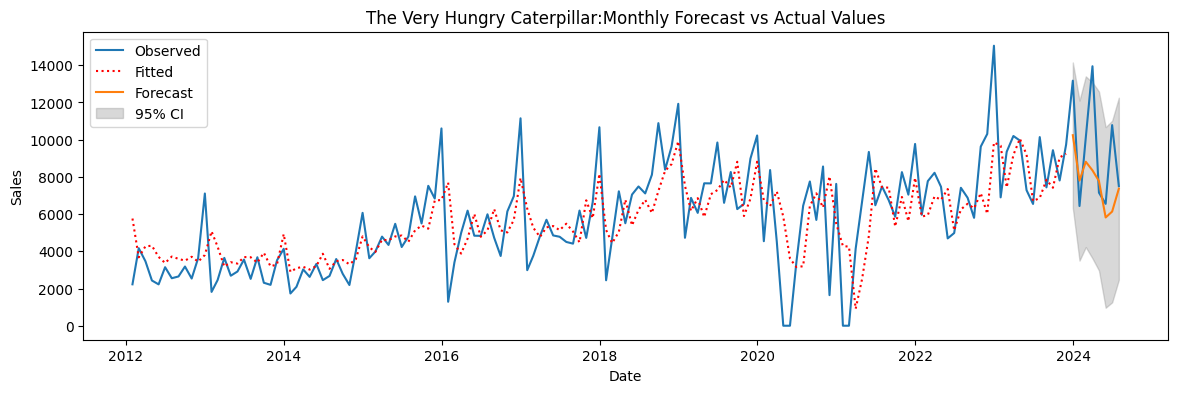

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt


forecast = model_caterpillar_monthly.predict(n_periods=forecast_horizon, return_conf_int=True)
forecast_values = forecast[0]
conf_int = forecast[1]

# Create forecast index to match test set
forecast_index = test_caterpillar_monthly.index

# Convert to Series for compatibility
forecast_series = pd.Series(forecast_values, index=forecast_index)
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)

# Evaluation
mae = mean_absolute_error(test_caterpillar_monthly, forecast_series)
mape = mean_absolute_percentage_error(test_caterpillar_monthly, forecast_series) * 100

print(f"Mean Absolute Error Caterpillar (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error Caterpillar (MAPE): {mape:.2f}%")

# Plot
N_plot = 200
plt.figure(figsize=(14, 4))
plt.plot(df_caterpillar_monthly.index[-N_plot:], df_caterpillar_monthly['Volume'][-N_plot:], label='Observed')
plt.plot(train_caterpillar_monthly.index[-N_plot:], model_caterpillar_monthly.predict_in_sample()[-N_plot:], ':', c='red', label='Fitted')
plt.plot(forecast_index, forecast_series, label='Forecast')
plt.fill_between(forecast_index, lower_series, upper_series, color='gray', alpha=0.3, label='95% CI')

plt.title('The Very Hungry Caterpillar:Monthly Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# Alchemist
model_alchemist_monthly = auto_arima(
    train_alchemist_monthly,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=0,  # No non-seasonal differencing
    seasonal=True,
    m=12,  # monthly seasonality
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    D=0,  # No seasonal differencing
    stepwise=True,
    suppress_warnings=True,
    stationary=True, information_criterion='aic',
    error_action="ignore", trace=True
)
print("Best ARIMA model for monthly prediction for The Alchemist:")
print(model_alchemist_monthly.summary())

# Get the best model parameters
print(f"Best alchemist ARIMA Model: {model_alchemist_monthly.order}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2352.814, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2321.034, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2312.014, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2638.083, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2342.425, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2312.258, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2301.591, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2302.842, Time=0.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2325.519, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2293.794, Time=0.52 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2308.339, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=2294.807, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2298.312, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=2294.749, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=2295.089, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=2295.167, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=2298.615, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,2)[12] intercept   : AIC=2294.463, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2296.222, Time=1.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12]             : AIC=2305.493, Time=1.96 sec

Best model:  ARIMA(1,0,1)(0,0,2)[12] intercept
Total fit time: 10.642 seconds
Best ARIMA model for monthly prediction for The Alchemist:
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1140.897
Date:                                 Tue, 13 May 2025   AIC                           2293.794
Time:                                         20:31:42   BIC                           2311.571
Sample:                                     01-31-2012   HQIC                          2301.018
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
                 coef    st

Mean Absolute Error alchemist (MAE): 751.36
Mean Absolute Percentage Error alchemist (MAPE): 32.24%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


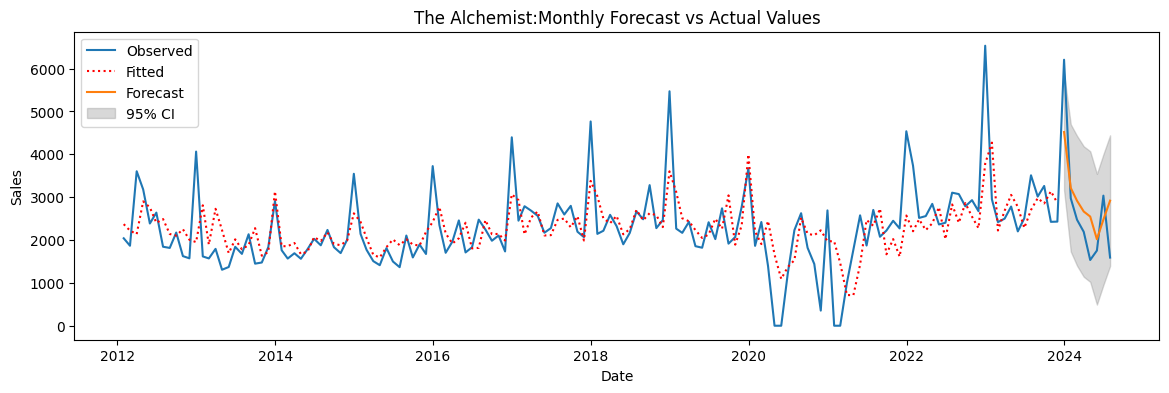

In [ ]:

forecast = model_alchemist_monthly.predict(n_periods=forecast_horizon, return_conf_int=True)
forecast_values = forecast[0]
conf_int = forecast[1]

# Create forecast index to match test set
forecast_index = test_alchemist_monthly.index

# Convert to Series for compatibility
forecast_series = pd.Series(forecast_values, index=forecast_index)
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)

# Evaluation
mae = mean_absolute_error(test_alchemist_monthly, forecast_series)
mape = mean_absolute_percentage_error(test_alchemist_monthly, forecast_series) * 100

print(f"Mean Absolute Error alchemist (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error alchemist (MAPE): {mape:.2f}%")

# Plot
N_plot = 200
plt.figure(figsize=(14, 4))
plt.plot(df_alchemist_monthly.index[-N_plot:], df_alchemist_monthly['Volume'][-N_plot:], label='Observed')
plt.plot(train_alchemist_monthly.index[-N_plot:], model_alchemist_monthly.predict_in_sample()[-N_plot:], ':', c='red', label='Fitted')
plt.plot(forecast_index, forecast_series, label='Forecast')
plt.fill_between(forecast_index, lower_series, upper_series, color='gray', alpha=0.3, label='95% CI')

plt.title('The Alchemist:Monthly Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

"Compare and contrast the monthly predictions of both books against the weekly predictions.

Comment on which one is more accurate or if they are the same."

For The Very Hungry Caterpillar, SARIMA produced a MAPE of 20.15%, while XGBoost achieved 11.57%. For The Alchemist, SARIMA resulted in a MAPE of 32.24%, and XGBoost achieved a notably better performance with a MAPE of 20.15%.

When comparing weekly and monthly predictions, XGBoost consistently performs well at both, although the model had higher accuracy at the weekly level. Meanwhile, SARIMA’s performance degraded in the monthly prediction, particularly for The Alchemist, which exhibited approximately 10% more error compared to its weekly counterpart. This suggests that while monthly predictions are useful for capturing broader sales trends, weekly forecasts provide finer accuracy and better adapt to short-term fluctuations, especially when using machine learning models like XGBoost.

Conclusion

This project explored a range of forecasting models—including statistical approaches like ARIMA and SARIMA, deep learning architectures such as LSTM, and hybrid combinations—to predict book sales for The Very Hungry Caterpillar and The Alchemist. While each method offered unique strengths, XGBoost emerged as the most effective model overall. In particular, weekly predictions using XGBoost consistently outperformed all other approaches, achieving the lowest error rates for both titles.